<a href="https://colab.research.google.com/github/Madawee/Summarizing-and-classifying-Arabic-texts/blob/main/Exploring_Arabic_NLP_Tasks_Traditional_vs_Modern_Approaches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Natural Language Processing**
##**Exploring Arabic NLP Tasks - Traditional vs. Modern Approaches Project:**

*   Madawee Alabdulkreem
*  Wasan Almansour




# **Introduction**

**In this project, we explore two NLP tasks: text classification and text summarization specifically to Arabic language. Our main objectives are to:**
<br><br>

**1- Compare how traditional approaches perform against modern deep-learning and transformer-based methods.**
<br><br>

**2- Understand which techniques work best for Arabic text.**


For both text classification and summarization, we have chosen the KALIMATArabic Corpus. This dataset contains a large collection of newspaper articles classified into six topics. Each article in KALIMAT comes with its assigned topic (for classification) as well as a  brief summary (for the summarization task). By working with KALIMAT, we can train and evaluate  models on real-world Arabic texts and directly compare our results in the same corpus.

Several challenges make Arabic NLP different from working with English or other European languages. First, Arabic morphology is highly complex: words are often formed by interleaving roots and patterns, which means basic tokenization and stemming require specialized tools. Second, diacritics  can drastically change a word’s meaning or pronunciation, but most online text is undiacritized, so normalization (removing diacritics, etc.) is a necessary preprocessing step. Finally, models for summarization face the additional difficulty that Arabic sentences tend to be longer and more complex than English, so capturing content in a shorter summary can be quite challenging.

## **Data Exploration and Preprocessing**
We will be using the KALIMAT dataset as it has classified articles with their corresponding summary.

The kalimat dataset has six catagories:


1.   Sport
2.   Economy
3.  Religion
4.  Local            
5.  Culture          
6.  International

Each file/article name is the catagory, month, and number (sportscjul1561, economycapr1643, etc.)



### **Dataset loading and exploration**

### Import local files and unzip them
The kalimat regular dataset and the kalimat summary dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
!unzip /content/drive/MyDrive/rar/Kalimat_Dataset.zip -d kalimat_dataset

Streaming output truncated to the last 5000 lines.
  inflating: kalimat_dataset/Kalimat_Dataset/articles-religion/articlesReligion/religioncoct1181.txt  
  inflating: kalimat_dataset/__MACOSX/Kalimat_Dataset/articles-religion/articlesReligion/._religioncoct1181.txt  
  inflating: kalimat_dataset/Kalimat_Dataset/articles-religion/articlesReligion/religioncmay623.txt  
  inflating: kalimat_dataset/__MACOSX/Kalimat_Dataset/articles-religion/articlesReligion/._religioncmay623.txt  
  inflating: kalimat_dataset/Kalimat_Dataset/articles-religion/articlesReligion/religioncapr1152.txt  
  inflating: kalimat_dataset/__MACOSX/Kalimat_Dataset/articles-religion/articlesReligion/._religioncapr1152.txt  
  inflating: kalimat_dataset/Kalimat_Dataset/articles-religion/articlesReligion/religioncjan1951.txt  
  inflating: kalimat_dataset/__MACOSX/Kalimat_Dataset/articles-religion/articlesReligion/._religioncjan1951.txt  
  inflating: kalimat_dataset/Kalimat_Dataset/articles-religion/articlesReligion/rel

In [ ]:
from google.colab import files
!unzip /content/drive/MyDrive/rar/kalimat_summary2.zip -d kalimat_summary

Streaming output truncated to the last 5000 lines.
  inflating: kalimat_summary/kalimat_summary/culture/culture/single/culturecjul991.txt  
  inflating: kalimat_summary/__MACOSX/kalimat_summary/culture/culture/single/._culturecjul991.txt  
  inflating: kalimat_summary/kalimat_summary/culture/culture/single/culturecfeb135.txt  
  inflating: kalimat_summary/__MACOSX/kalimat_summary/culture/culture/single/._culturecfeb135.txt  
  inflating: kalimat_summary/kalimat_summary/culture/culture/single/culturecmay1160.txt  
  inflating: kalimat_summary/__MACOSX/kalimat_summary/culture/culture/single/._culturecmay1160.txt  
  inflating: kalimat_summary/kalimat_summary/culture/culture/single/culturecjun638.txt  
  inflating: kalimat_summary/__MACOSX/kalimat_summary/culture/culture/single/._culturecjun638.txt  
  inflating: kalimat_summary/kalimat_summary/culture/culture/single/culturecmay393.txt  
  inflating: kalimat_summary/__MACOSX/kalimat_summary/culture/culture/single/._culturecmay393.txt  
  

By looking at the files of the data we can see the path for each one.
We will store the data in a dataframe based on the catagorey and save the file name to match with the summary data.

The df will have 3 columns:


1.   text
2.   category label
3.   file name label



Loading the Kalimat dataset

In [ ]:
#import libraries to load and process the dataset
import os
import pandas as pd
import glob
from tqdm import tqdm


#the paths based on the kalimat folder and lables
base_path = '/content/kalimat_dataset/Kalimat_Dataset'

#putting the categories in a dictionary for easier labling
categories = {
    "culture": f'{base_path}/articles-culture/articlesCulture/*.txt',
    "economy": f'{base_path}/articlesEconomy/*.txt',
    "international": f'{base_path}/articles-international/articlesInternational/*.txt',
    "local": f'{base_path}/articles-local/articlesLocal/*.txt',
    "religion": f'{base_path}/articles-religion/articlesReligion/*.txt',
    "sports": f'{base_path}/articles-sports/articlesSports/*.txt'
}

#function to load the data in a df
def load_dataset(categories):
    data = []
    labels = []
    filenames = []

    for label, pattern in categories.items():
        files = glob.glob(pattern, recursive=True)

        for file_path in tqdm(files, desc=f'Loading {label}'):
            with open(file_path, 'r', encoding='utf-8') as f:
                #extract filename
                filename = os.path.splitext(os.path.basename(file_path))[0]
                text = f.read()

                #add to all lists
                data.append(text)
                labels.append(label)
                filenames.append(filename)

    return pd.DataFrame({
        'text': data,
        'category_label': labels,
        'filename_label': filenames
    })

#load the regular dataset
df = load_dataset(categories)

#check the dataframe
print(f"total number of samples: {len(df)}")
print("\nlabel distribution:")
print(df['category_label'].value_counts())
print("\nfirst 3 rows:")
df.head(3)

Loading sports: 100%|██████████| 4095/4095 [00:00<00:00, 11256.60it/s]


total number of samples: 18256

label distribution:
category_label
sports           4095
religion         3475
economy          3265
local            3237
culture          2495
international    1689
Name: count, dtype: int64

first 3 rows:


,text,category_label,filename_label
0,تستعد\nالجمعية\nالعمانية\nللفنون\nالتشكيلية\nل...,culture,culturecjun1611
1,ومن\nالبرامج\nالتي\nتلتقي\nالجمهور\nعلى\nالهوا...,culture,culturecoct1046
2,شهادات\nفي\nحياته\nوأنا\nاكتب\nهذه\nالأسطر\nفي...,culture,culturecjan394


In [ ]:
print(df['text'][2])

6
إلهام
شاهين
:
لن
أتسول
على
مكاتب
مسئولي
التليفزيون
المصرى
لعرض
أعمالي
القاهرة
(
الوطن
)
:
الفنانة
إلهام
شاهين
استطاعت
أن
تجذب
الأنظار
إليها
في
شهر
رمضان
من
خلال
مسلسل
(
بنت
أفندينا
)
و
(
امرأة
من
نار
)
لتقديمها
لشخصيتين
مختلفتين
قدمتهما
بشكل
متميز
.
في
البداية
أكدت
إلهام
شاهين
أنها
سعيدة
برد
فعل
الجمهور
حول
مسلسل
(
بنت
افندينا
)
مؤكدة
انها
تلقت
عددا
كبيرا
من
التهاني
عن
دورها
في
هذا
العمل
خاصة
من
الدول
العربية
سواء
من
خلال
البريد
الإلكتروني
أو
الاتصالات
التليفونية
.
وقالت
إلهام
شاهين
لست
حزينة
لعدم
عرض
مسلسل
(
بنت
أفندينا
)
في
القنوات
الأرضية
حيث
اكتشفت
ان
عرضه
في
الفضائية
يحظى
بنسبة
مشاهدة
كبيرة
جدا
بالاضافة
إلى
انه
تم
تسويقه
إلى
18
محطة
فضائية
منها
15
محطة
خارج
مصر
وثلاث
داخل
مصر
هي
الفضائية
والنيل
للدراما
والمحور
وقد
ظهر
هذا
النجاح
أيضا
من
خلال
استضافتي
في
احد
البرامج
على
الهواء
ووجدت
صدى
واسعا
وكبيرا
لهذا
المسلسل
من
الجمهور
.
مشاهدة
أكبر



Loading the Summary Kalimat dataset

In [ ]:
base_path_sum = '/content/kalimat_summary/kalimat_summary'

def load_dataset(categories):
    data = []
    labels = []
    filenames = []

    for label, pattern in categories.items():
        files = glob.glob(pattern, recursive=True)

        for file_path in tqdm(files, desc=f'Loading {label}'):
                with open(file_path, 'r', encoding='windows-1256') as f:  # استخدام windows-1256
                    filename = os.path.splitext(os.path.basename(file_path))[0]
                    text = f.read()

                    data.append(text)
                    labels.append(label)
                    filenames.append(filename)

    return pd.DataFrame({
        'text_sum': data,
        'category_label': labels,
        'filename_label': filenames
    })

categories_sum = {
    "culture": f'{base_path_sum}/culture/culture/single/*.txt',
    "economy": f'{base_path_sum}/Economy/Economy/single/*.txt',
    "international": f'{base_path_sum}/international/international/single/*.txt',
    "local": f'{base_path_sum}/Local/Local/single/*.txt',
    "religion": f'{base_path_sum}/Religion/Religion/single/*.txt',
    "sports": f'{base_path_sum}/Sports/Sports/single/*.txt'
}

df_sum = load_dataset(categories_sum)

#check the dataframe
print(f"total number of samples: {len(df_sum)}")
print("\nlabel distribution:")
print(df_sum['category_label'].value_counts())
print("\nfirst 3 rows:")
df_sum.head(3)

Loading sports: 100%|██████████| 4095/4095 [00:00<00:00, 16176.10it/s]


total number of samples: 18256

label distribution:
category_label
sports           4095
religion         3475
economy          3265
local            3237
culture          2495
international    1689
Name: count, dtype: int64

first 3 rows:


,text_sum,category_label,filename_label
0,وسيحل\n ضيفا\n على\n الجمعية\n العمانية\n للف...,culture,culturecjun1611
1,ويقدم\n البرنامج\n العديد\n من\n الوجبات\n ال...,culture,culturecoct1046
2,وتقول\n ابنته\n الدكتورة\n علياء\n :\n يكفي\n...,culture,culturecjan394


In [ ]:
print(df_sum['text_sum'][2])

 وقالت
 إلهام
 شاهين
 لست
 حزينة
 لعدم
 عرض
 مسلسل
 (
 بنت
 أفندينا
 )
 في
 القنوات
 الأرضية
 حيث
 اكتشفت
 ان
 عرضه
 في
 الفضائية
 يحظى
 بنسبة
 مشاهدة
 كبيرة
 جدا
 بالاضافة
 إلى
 انه
 تم
 تسويقه
 إلى
 18
 محطة
 فضائية
 منها
 15
 محطة
 خارج
 مصر
 وثلاث
 داخل
 مصر
 هي
 الفضائية
 والنيل
 للدراما
 والمحور
 وقد
 ظهر
 هذا
 النجاح
 أيضا
 من
 خلال
 استضافتي
 في
 احد
 البرامج
 على
 الهواء
 ووجدت
 صدى
 واسعا
 وكبيرا
 لهذا
 المسلسل
 من
 الجمهور. 6
 إلهام
 شاهين
 :
 لن
 أتسول
 على
 مكاتب
 مسئولي
 التليفزيون
 المصرى
 لعرض
 أعمالي
 القاهرة
 (
 الوطن
 )
 :
 الفنانة
 إلهام
 شاهين
 استطاعت
 أن
 تجذب
 الأنظار
 إليها
 في
 شهر
 رمضان
 من
 خلال
 مسلسل
 (
 بنت
 أفندينا
 )
 و
 (
 امرأة
 من
 نار
 )
 لتقديمها
 لشخصيتين
 مختلفتين
 قدمتهما
 بشكل
 متميز. في
 البداية
 أكدت
 إلهام
 شاهين
 أنها
 سعيدة
 برد
 فعل
 الجمهور
 حول
 مسلسل
 (
 بنت
 افندينا
 )
 مؤكدة
 انها
 تلقت
 عددا
 كبيرا
 من
 التهاني
 عن
 دورها
 في
 هذا
 العمل
 خاصة
 من
 الدول
 العربية
 سواء
 من
 خلال
 البريد
 الإلكتروني
 أو
 الاتصالات
 التليفونية. مشاهد

### **Preprocessing the text**
We will use arabic **nltk** library for preprocessing text data
and **pyarabic** to remove the diacritics (if there is any) using the strip_tashkeel function

In [ ]:
!pip install pyarabic
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 4.0 MB/s eta 0:00:00


In [ ]:
#Import NLP Preprocessing Libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
from pyarabic.araby import strip_tashkeel

# Initialize Arabic NLP tools
nltk.download('stopwords')
arabic_stopwords = set(stopwords.words('arabic'))
stemmer = ISRIStemmer()

#Arabic text preprocessing function
def preprocess_arabic_text(text):

    # Remove diacritics
    text = strip_tashkeel(text)

    # Normalize characters
    text = re.sub(r'[إأآا]', 'ا', text)
    text = re.sub(r'[يى]', 'ي', text)
    text = re.sub(r'ؤ', 'و', text)
    text = re.sub(r'ئ', 'ي', text)
    text = re.sub(r'ة', 'ه', text)

    # Remove repeated letters
    text = re.sub(r'(.)\1+', r'\1\1', text)

    # Remove numbers and special characters
    text = re.sub(r'[^ء-ي\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in arabic_stopwords]

    # Stemming
    stemmed = [stemmer.stem(word) for word in tokens]

    return " ".join(stemmed)

#Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_arabic_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Data Exploration and Visualization**

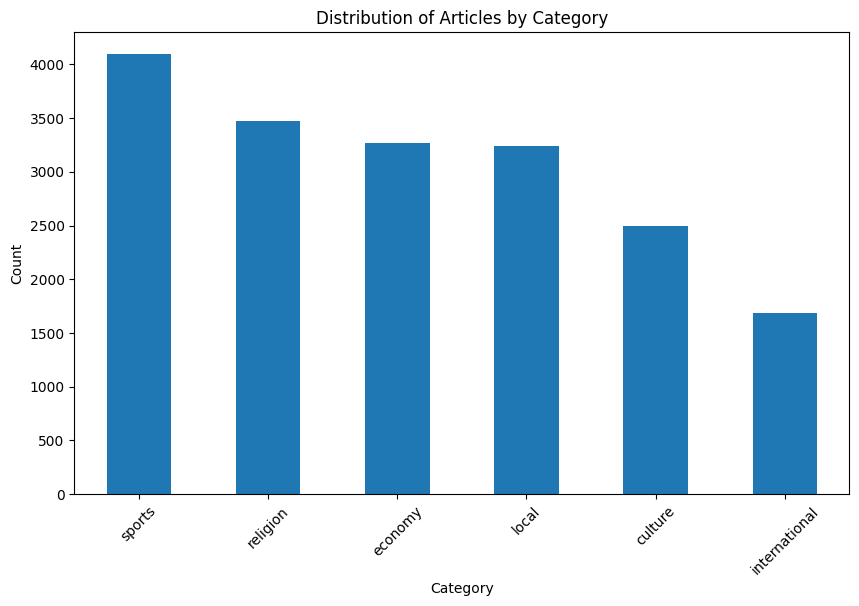

In [ ]:
#matplotlib and seaborn allow us to create plots and visualize data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
df['category_label'].value_counts().plot(kind='bar')
plt.title("Distribution of Articles by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

We can see the data is unbalanced

In [ ]:
# Dataset overview
print("Main Dataset Shape:", df.shape)
print("Summary Dataset Shape:", df_sum.shape)
print("\nNumber of unique in main filenames", df['filename_label'].nunique())
print("\nNumber of unique in summary filenames", df_sum['filename_label'].nunique())
print("\nAverage article length:", df['text'].str.split().apply(len).mean())
print("Average summary length:", df_sum['text_sum'].str.split().apply(len).mean())

Main Dataset Shape: (18256, 4)
Summary Dataset Shape: (18256, 3)

Number of unique in main filenames 18256

Number of unique in summary filenames 18256

Average article length: 515.6532646801052
Average summary length: 178.46023225241018


In [ ]:
df.head()

,text,category_label,filename_label,clean_text
0,الكويت\n(\nالوطن\n)\n:\nقال\nمدير\nادارة\nالمو...,culture,culturecjun499,كوت وطن قال دير دره وسق جلس وطن ثقف فنن ادب حم...
1,كتب\n-\nعبدالله\nالجهوري\n:\nنظمت\nوزارة\nالتر...,culture,culturecfeb1629,كتب عبدالل جهر نظم وزر ترث ثقف اطر جهد واصل كف...
2,6\nإلهام\nشاهين\n:\nلن\nأتسول\nعلى\nمكاتب\nمسئ...,culture,culturecnov6,هام شاه تسل علي كتب سيل يفز صري عرض عمل قهر وط...
3,أراه\nيوميا\nتقريبا\nفهو\nأحد\nالسكان\nالمقيمي...,culture,culturecsep304,اره يوم قرب فهو احد سكن قيم حين حفظ شكل عرف سم...
4,نزوى\nمن\nسالم\nبن\nعبدالله\nالسالمي\n:\nاختتم...,culture,culturecnov490,نزي سلم بن عبدالل سلم ختم امس اول رعي عقد بن ن...


The data has been cleaned

##  **PHASE 1- Traditional NLP methods**

### **Task 1 – Text Classification**

#### **Step 1: TF-IDF Feature Extraction for Text**
We will use **TfidfVectorizer** from the sickit library to convert the Text into numerical features using unigrams and bigrams, keeping the top 5000 features.

We testd the ngram range and found 1-4 had the best results

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

#tokenizer to split text by spaces
def arabic_tokenizer(text):
    return text.split()

#create a TF-IDF vectorizer
tfidf = TfidfVectorizer(
    tokenizer=arabic_tokenizer,
    max_features=5000,
    ngram_range=(1, 4)
)

#convert cleaned text into TF-IDF features for training the ML model
X = tfidf.fit_transform(df['clean_text'])

# تحويل الفئات إلى أرقام
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['category_label'])

#convert to df to see the top features
feature_names = tfidf.get_feature_names_out()
tfidf_df = pd.DataFrame(X.toarray(), columns=feature_names)


print("TF-IDF matrix shape:", X.shape)
print("top 10 features:", feature_names[:10])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF matrix shape: (18256, 5000)
top 10 features: ['ابء' 'ابا' 'ابب' 'ابتداييه' 'ابد' 'ابر' 'ابض' 'ابع' 'ابل' 'ابن']


#### **Step 2: Text Classification Using Support Vector Machine (SVM)**
We will split the TF-IDF features into training and testing sets, then train the **SVM** classifier. After that, we’ll evaluate the performance using accuracy classification report, and confusion matrix.

We used the linear kernel as it's often effective for text classification.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#split the data 80% for train 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create the SVM model
svm_clf = SVC(kernel='linear')

#train the model
svm_clf.fit(X_train, y_train)

#predict and test
y_pred = svm_clf.predict(X_test)

#Print evaluation results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9364731653888281

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       480
           1       0.88      0.91      0.89       658
           2       0.96      0.95      0.96       323
           3       0.89      0.84      0.86       697
           4       0.98      1.00      0.99       681
           5       0.99      0.99      0.99       813

    accuracy                           0.94      3652
   macro avg       0.94      0.94      0.94      3652
weighted avg       0.94      0.94      0.94      3652


Confusion Matrix:
 [[446   3   5  18   7   1]
 [  3 599   5  48   1   2]
 [  8   6 308   1   0   0]
 [ 27  72   3 584   8   3]
 [  2   0   0   0 679   0]
 [  1   1   1   6   0 804]]


####**Results and Analysis**

The Accuracy reached about **0.939**, which is a very high accuracy. The model over all classifies most texts correctly.

*Religion and Sports* categories has the best results, especially on precision and recall which can be due to the unbalance in the data as it has high accuracy for dominant classes (*religion, sports*) while Smaller/mid-sized classes (*economy, local, culture*) suffer more misclassifications.

**Save the model into Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pickle

save_path = "/content/saved_svm_model"
os.makedirs(save_path, exist_ok=True)

# Save SVM Model
with open(os.path.join(save_path, "svm_model.pkl"), "wb") as f:
    pickle.dump(svm_clf, f)

# Save TF-IDF
with open(os.path.join(save_path, "tfidf_vectorizer.pkl"), "wb") as f:
    pickle.dump(tfidf, f)

# Save LabelEncoder
with open(os.path.join(save_path, "label_encoder.pkl"), "wb") as f:
    pickle.dump(label_encoder, f)

In [ ]:
import shutil
# Make a copy to Google Drive
drive_path = "/content/drive/MyDrive/saved_svm_model"
shutil.copytree(save_path, drive_path)

'/content/drive/MyDrive/saved_svm_model'

### **Task 2 - Text Summarization using TF-IDF**

This is done by creating  a summarize function with a percentage summary length that is extracted from 'text' which :
1. splits text into sentences
2. removes unwanted spaces
3. vectorize and score sentences
4. extracting the top (0.x ratio) sentences using the max function
5. merge df and df_sum to end up with the original text and corressponding summary
6. Clean text
7. Generate and display summaries



In [ ]:
import numpy as np

def summarize(text, ratio=0.2):

    #Tokenize sentences
    sentences = [s.strip() for s in re.split(r'[.؟!\n]+', text) if s.strip()]
    if len(sentences) <= 1:
        return text

    #Vectorize and score sentences
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(sentences)
    scores = np.array(tfidf_matrix.sum(axis=1)).flatten()

    #Get top sentences
    n = max(1, int(len(sentences) * ratio))
    top_idx = scores.argsort()[-n:][::-1]
    return ' '.join(np.array(sentences)[top_idx])

#Prepare data
merged_df = pd.merge(df, df_sum, on='filename_label')

#Clean text
text_columns = ['text', 'text_sum']
for col in text_columns:
    merged_df[f'{col}_clean'] = (
        merged_df[col]
        .str.replace(r'\s+', ' ', regex=True)
        .str.strip()
    )

#Generate summaries for both 0.2 and 0.3 ratios
merged_df['generated_summary_20'] = merged_df['text_clean'].apply(lambda x: summarize(x, ratio=0.2))
merged_df['generated_summary_30'] = merged_df['text_clean'].apply(lambda x: summarize(x, ratio=0.3))

#### **Evaluation and results for Task 2**

In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=4b8ae872933130c729ccd1b4d39ad9b1433bb5b7c18868ea917890bbda6ad912
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu
import pandas as pd

# Initialize scorers
scorer = rouge_scorer.RougeScorer(['rouge1'])
bleu_scores_20 = []
rouge_scores_20 = []

bleu_scores_30 = []
rouge_scores_30 = []

#Calculate scores
for ref, gen20, gen30 in zip(merged_df['text_sum'],
                             merged_df['generated_summary_20'],
                             merged_df['generated_summary_30']):
       if pd.notna(ref):
        #for ratio 0.2
        if pd.notna(gen20):
            bleu_scores_20.append(sentence_bleu([ref.split()], gen20.split()))
            rouge_scores_20.append(scorer.score(ref, gen20)['rouge1'].fmeasure)

        #for ratio 0.3
        if pd.notna(gen30):
            bleu_scores_30.append(sentence_bleu([ref.split()], gen30.split()))
            rouge_scores_30.append(scorer.score(ref, gen30)['rouge1'].fmeasure)

#compute averages
avg_bleu_20 = sum(bleu_scores_20) / len(bleu_scores_20)
avg_rouge_20 = sum(rouge_scores_20) / len(rouge_scores_20)

avg_bleu_30 = sum(bleu_scores_30) / len(bleu_scores_30)
avg_rouge_30 = sum(rouge_scores_30) / len(rouge_scores_30)

# Display results
print("Evaluation Results")
print(f"[0.2] Average BLEU: {avg_bleu_20:.3f} | Average ROUGE-1: {avg_rouge_20:.3f}")
print(f"[0.3] Average BLEU: {avg_bleu_30:.3f} | Average ROUGE-1: {avg_rouge_30:.3f}")


/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

Evaluation Results
[0.2] Average BLEU: 0.445 | Average ROUGE-1: 0.341
[0.3] Average BLEU: 0.481 | Average ROUGE-1: 0.365


####**Results and Analysis**
Summaries at a **0.2 ratio** performed worse than the **0.3 ratio**. 0.3 ratio which, took 30% of the overall original text length, had a more accurate, and a better performance, which leaded to that summaries became more comprehensive and accurate as the length of the summary increased.

**200 Samples**

In [ ]:
#getting 200 random samples
_, sample_idx = train_test_split(
    merged_df.index, test_size=200, stratify=merged_df['category_label_x'], random_state=42
)
sample_df = merged_df.loc[sample_idx].reset_index(drop=True)

In [ ]:
#generate summaries for 0.2 ratio with time
start_time_20 = time.time()
sample_df['generated_summary_20'] = sample_df['text_clean'].apply(lambda x: summarize(x, ratio=0.2))
end_time_20 = time.time()

#calculate time
time_20 = end_time_20 - start_time_20
print(f"Generated 0.2 ratio summaries in {time_20:.2f} seconds")
print(f"Average time per summary (0.2 ratio): {time_20/len(merged_df):.4f} seconds\n")

#generate summaries for 0.3 ratio with time
start_time_30 = time.time()
sample_df['generated_summary_30'] = sample_df['text_clean'].apply(lambda x: summarize(x, ratio=0.3))
end_time_30 = time.time()

#calculate time
time_30 = end_time_30 - start_time_30
print(f"Generated 0.3 ratio summaries in {time_30:.2f} seconds")
print(f"Average time per summary (0.3 ratio): {time_30/len(merged_df):.4f} seconds")

Generated 0.2 ratio summaries in 0.46 seconds
Average time per summary (0.2 ratio): 0.0000 seconds

Generated 0.3 ratio summaries in 0.45 seconds
Average time per summary (0.3 ratio): 0.0000 seconds


In [ ]:
sample_df

,text,category_label_x,filename_label,text_sum,category_label_y,text_clean,text_sum_clean,generated_summary_20,generated_summary_30
0,أحسك\nحزن\nالارض\nتنداح\nدمعة\nعلى\nوجنات\nالل...,culture,culturecmar1338,أحسك\n حزن\n الارض\n تنداح\n دمعة\n على\n وجن...,culture,أحسك حزن الارض تنداح دمعة على وجنات الليل والل...,أحسك حزن الارض تنداح دمعة على وجنات الليل والل...,أحسك حزن الارض تنداح دمعة على وجنات الليل والل...,أحسك حزن الارض تنداح دمعة على وجنات الليل والل...
1,تدشن\nشرطة\nعمان\nالسلطانية\nالاثنين\nالمقبل\n...,local,localcapr158,آلية\n وبالنسبة\n للآلية\n أو\n الكيفية\n الت...,local,تدشن شرطة عمان السلطانية الاثنين المقبل خدمة ا...,آلية وبالنسبة للآلية أو الكيفية التي سيتمكن به...,آلية وبالنسبة للآلية أو الكيفية التي سيتمكن به...,آلية وبالنسبة للآلية أو الكيفية التي سيتمكن به...
2,واقع\nالأمة\nالإسلامية\nوأكد\nد\n.\nداود\nأن\n...,religion,religioncjul1075,وأوضح\n أن\n اختياره\n للشيخ\n الغزالي\n نموذ...,religion,واقع الأمة الإسلامية وأكد د . داود أن الشيخ ال...,وأوضح أن اختياره للشيخ الغزالي نموذجا للداعية ...,وأوضح أن اختياره للشيخ الغزالي نموذجا للداعية ...,وأوضح أن اختياره للشيخ الغزالي نموذجا للداعية ...
3,مدريد\nا\n.\nف\n.\nب\n:\nتنتظر\nالمتهمين\nالار...,international,internationalcmar1391,مدريد\n ا. ب\n :\n تنتظر\n المتهمين\n الاربعة...,international,مدريد ا . ف . ب : تنتظر المتهمين الاربعة الجدد...,مدريد ا. ب : تنتظر المتهمين الاربعة الجدد الذي...,ب : تنتظر المتهمين الاربعة الجدد الذين قرر الق...,ب : تنتظر المتهمين الاربعة الجدد الذين قرر الق...
4,يدشن\nمعالي\nالدكتور\nمحمد\nبن\nحمد\nالرمحي\nو...,economy,economycdec607,فيما\n سيتم\n تسليم\n الفائزين\n الآخرين\n جو...,economy,يدشن معالي الدكتور محمد بن حمد الرمحي وزير الن...,فيما سيتم تسليم الفائزين الآخرين جوائزهم عبر ص...,فيما سيتم تسليم الفائزين الآخرين جوائزهم عبر ص...,فيما سيتم تسليم الفائزين الآخرين جوائزهم عبر ص...
...,...,...,...,...,...,...,...,...,...
195,هل\nيستطيع\nالشباب\nاليوم\nتحقيق\nما\nاستحال\n...,sports,sportscapr1294,هل\n يستطيع\n الشباب\n اليوم\n تحقيق\n ما\n ا...,sports,هل يستطيع الشباب اليوم تحقيق ما استحال عليه في...,هل يستطيع الشباب اليوم تحقيق ما استحال عليه في...,هل يستطيع الشباب اليوم تحقيق ما استحال عليه في...,هل يستطيع الشباب اليوم تحقيق ما استحال عليه في...
196,2\n:\n.\n.20040113.1\n_\n3\n.\n250\n237\nسلطان...,sports,sportscjan962,وتحدث\n عن\n عودة\n منتخب\n العراق\n قائلا\n ...,sports,2 : . .20040113.1 _ 3 . 250 237 سلطان بن فهد :...,وتحدث عن عودة منتخب العراق قائلا المنتخب العرا...,وتحدث عن عودة منتخب العراق قائلا المنتخب العرا...,وتحدث عن عودة منتخب العراق قائلا المنتخب العرا...
197,القاهرة\nمن\nمحمد\nعمر\n:\nأصدرت\nأميركا\nمؤخر...,religion,religioncapr1344,القاهرة\n من\n محمد\n عمر\n :\n أصدرت\n أميرك...,religion,القاهرة من محمد عمر : أصدرت أميركا مؤخرا قانون...,القاهرة من محمد عمر : أصدرت أميركا مؤخرا قانون...,فلا يكلف الله نفسا إلا وسعها لكن أن يجد الإنسا...,فلا يكلف الله نفسا إلا وسعها لكن أن يجد الإنسا...
198,ليست\nهذه\nدروس\n(\nمحو\nالأمية\n)\nفالقراءة\n...,religion,religioncjan1088,لأنك\n قد\n تريد\n ملعومات\n نشرت\n في\n عام\...,religion,ليست هذه دروس ( محو الأمية ) فالقراءة مثل أي ش...,لأنك قد تريد ملعومات نشرت في عام قديم أو حديث ...,لأنك قد تريد ملعومات نشرت في عام قديم أو حديث ...,لأنك قد تريد ملعومات نشرت في عام قديم أو حديث ...


In [ ]:
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu
import pandas as pd

# Initialize scorers foe 200 samples
scorer = rouge_scorer.RougeScorer(['rouge1'])
bleu_scores_20 = []
rouge_scores_20 = []

bleu_scores_30 = []
rouge_scores_30 = []

#Calculate scores
for ref, gen20, gen30 in zip(sample_df['text_sum'],
                             sample_df['generated_summary_20'],
                             sample_df['generated_summary_30']):
    if pd.notna(ref):
        #for ratio 0.2
        if pd.notna(gen20):
            bleu_scores_20.append(sentence_bleu([ref.split()], gen20.split()))
            rouge_scores_20.append(scorer.score(ref, gen20)['rouge1'].fmeasure)

        #for ratio 0.3
        if pd.notna(gen30):
            bleu_scores_30.append(sentence_bleu([ref.split()], gen30.split()))
            rouge_scores_30.append(scorer.score(ref, gen30)['rouge1'].fmeasure)

#compute averages
avg_bleu_20 = sum(bleu_scores_20) / len(bleu_scores_20)
avg_rouge_20 = sum(rouge_scores_20) / len(rouge_scores_20)

avg_bleu_30 = sum(bleu_scores_30) / len(bleu_scores_30)
avg_rouge_30 = sum(rouge_scores_30) / len(rouge_scores_30)

# Display results
print("Evaluation Results")
print(f"[0.2] Average BLEU: {avg_bleu_20:.3f} | Average ROUGE-1: {avg_rouge_20:.3f}")
print(f"[0.3] Average BLEU: {avg_bleu_30:.3f} | Average ROUGE-1: {avg_rouge_30:.3f}")


/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


Evaluation Results
[0.2] Average BLEU: 0.457 | Average ROUGE-1: 0.308
[0.3] Average BLEU: 0.483 | Average ROUGE-1: 0.324


**Save the model into Google Drive**

In [ ]:
!mkdir -p /content/drive/MyDrive/saved_summarizer_t

In [ ]:
import pickle

# Save TfidfVectorizer
with open("/content/drive/MyDrive/saved_summarizer_t/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

In [ ]:
with open("/content/drive/MyDrive/saved_summarizer_t/summarizer.py", "w", encoding="utf-8") as f:
    f.write("""
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer

def summarize(text, tfidf, ratio=0.2):
    sentences = [s.strip() for s in re.split(r'[.؟!\\n]+', text) if s.strip()]
    if len(sentences) <= 1:
        return text
    tfidf_matrix = tfidf.fit_transform(sentences)
    scores = np.array(tfidf_matrix.sum(axis=1)).flatten()
    n = max(1, int(len(sentences) * ratio))
    top_idx = scores.argsort()[-n:][::-1]
    return ' '.join(np.array(sentences)[top_idx])
""")

In [ ]:
import pickle
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Load TfidfVectorizer
with open("/content/drive/MyDrive/saved_summarizer_t/tfidf_vectorizer.pkl", "rb") as f:
    tfidf = pickle.load(f)

##  **PHASE 2 - Modren Method - Using Deep learning and Transformer-based approaches**

### **Task 1: Text Classification - Using Transformer-based approaches (AraBERT)**

In this step, we will use the AraBERT model, a transformer-based model pre-trained on Arabic text, to perform text classification.
We’ll start by encoding the labels, splitting the dataset into training and testing sets, and then preparing the data for AraBERT using Hugging Face’s Transformers library.
After training, we’ll evaluate the model using accuracy, F1-score, and a classification report.

Install required libraries: Hugging Face Transformers, Datasets, and Scikit-learn

In [ ]:
!pip install transformers datasets scikit-learn --quiet

#### **Encoding Class Labels**

In [ ]:
# Import LabelEncoder to convert text labels (categories) into numeric values
from sklearn.preprocessing import LabelEncoder

# Encode the text labels into numbers
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["category_label"])

# Display labels and their numeric values
num_labels = len(label_encoder.classes_)
print("Classes:", label_encoder.classes_)
print("Classes with numbers:", df["label"].unique())

Classes: ['culture' 'economy' 'international' 'local' 'religion' 'sports']
Classes with numbers: [0 1 2 3 4 5]


Convert the text category_label into numeric from 0-5 and save it into new column label

#### **Train-Test**
Split the data into train and test sets (80% train, 20% test) and use stratify ensures balanced label distribution

In [ ]:
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["clean_text"].tolist(), df["label"].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df["label"]  # ensures balanced class distribution
)

##### **Preparing Hugging Face Dataset Format**
*   Convert training and testing data into **HuggingFace Dataset format**
*   Create a Dictionary to store both train and test datasets into a single dictionary



In [ ]:
from datasets import Dataset, DatasetDict
import pandas as pd

train_dataset = Dataset.from_pandas(pd.DataFrame({"text": train_texts, "label": train_labels}))
test_dataset = Dataset.from_pandas(pd.DataFrame({"text": test_texts, "label": test_labels}))

dataset = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

##### **Loading AraBERT Tokenizer and Pre-trained Model**

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

# Load the tokenizer and model (AraBERT pretrained model for Arabic)
model_name = "aubmindlab/bert-base-arabertv02"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)


# Apply the tokenizer on the entire dataset
def tokenize_function(example):
    return tokenizer(example['text'], truncation=True, padding=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/381 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/825k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.64M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/14604 [00:00<?, ? examples/s]

Map:   0%|          | 0/3652 [00:00<?, ? examples/s]

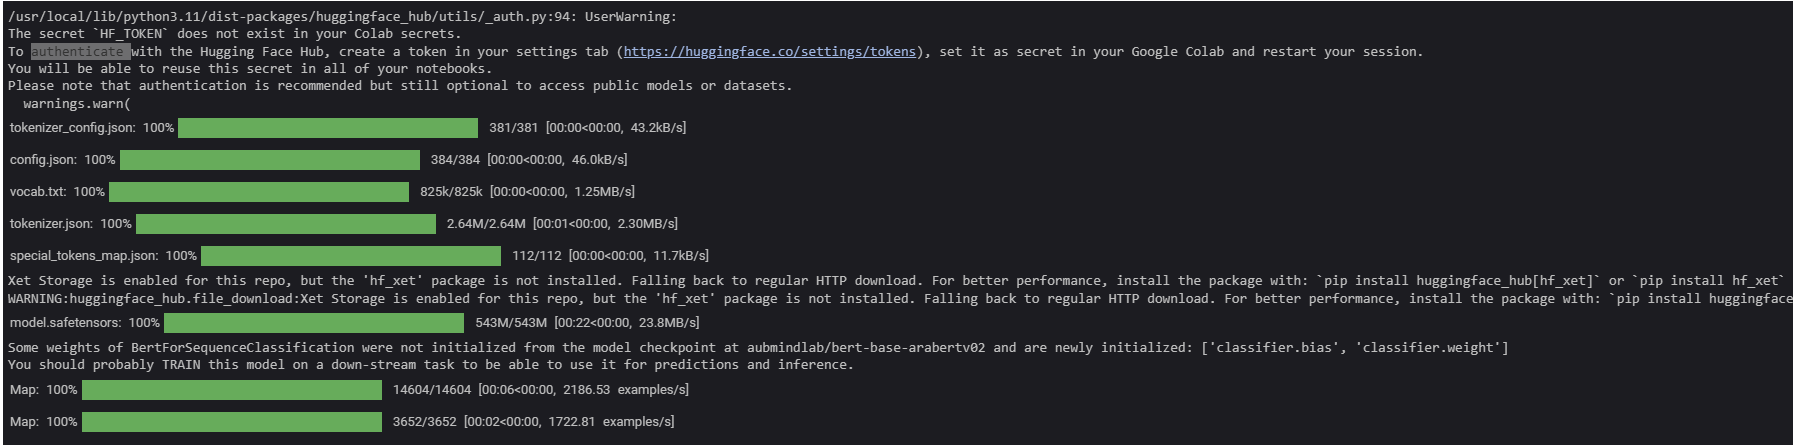

Defining Evaluation Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

# Function to compute evaluation metrics after predictions
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1 }

##### **Setting Training Parameters**

In [ ]:
# Define the training configuration for the model
# Includes parameters such as number of epochs, learning rate, batch size

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_steps=10,
    logging_dir="./logs",
    report_to=[]
)

# Create the Trainer object with model, data, tokenizer, and metrics for training and evaluation
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
     tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


# Start training the model
trainer.train()

<ipython-input-26-450f28848fa4>:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.392100,0.277947,0.929080,0.929701,0.929080,0.928951
2,0.342600,0.238904,0.940307,0.940451,0.940307,0.940089


Time taken: 715.9115 seconds


Took about 45 min using T4-GPU

#### **Evaluate the performance using** **accuracy classification report, and confusion matrix**.

In [ ]:
# Evaluate the model on the test set
results = trainer.evaluate()
print("Evaluation Results:", results)

# Predictions on the test set
predictions = trainer.predict(tokenized_datasets["test"])
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids

print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=label_encoder.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

Evaluation Results: {'eval_loss': 0.23890358209609985, 'eval_accuracy': 0.9403066812705367, 'eval_precision': 0.9404514714292388, 'eval_recall': 0.9403066812705367, 'eval_f1': 0.9400888401908882, 'eval_runtime': 26.9773, 'eval_samples_per_second': 135.373, 'eval_steps_per_second': 16.94, 'epoch': 2.0}

Classification Report:
                precision    recall  f1-score   support

      culture       0.94      0.90      0.92       499
      economy       0.88      0.93      0.91       653
international       0.94      0.94      0.94       338
        local       0.90      0.86      0.88       648
     religion       0.99      0.99      0.99       695
       sports       0.98      0.99      0.99       819

     accuracy                           0.94      3652
    macro avg       0.94      0.94      0.94      3652
 weighted avg       0.94      0.94      0.94      3652


Confusion Matrix:
 [[447   6  15  23   6   2]
 [  5 609   4  33   0   2]
 [  3  13 319   3   0   0]
 [ 17  62   0 557 

#### **Results and Analysis**

AraBERT achieved high performance with **94% accuracy and 0.94 F1-score**, showing strong results across all categories. It performed best in religion and sports (F1 = 0.99), while economy, culture, and local had slightly lower but still strong scores (0.86–0.92).

Most misclassifications were between similar categories, but overall predictions were highly accurate, confirming AraBERT’s strength in Arabic text classification.

**Save the model into Google Drive**

In [ ]:
# Save tokenizer
model.save_pretrained("saved_model/")
tokenizer.save_pretrained("saved_model/")

# Save  LabelEncoder
import pickle
with open("saved_model/label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

In [ ]:
import shutil
shutil.copytree('/content/saved_model', '/content/drive/MyDrive/saved_model')

### **Task 1: Text Summarization - Using Transformer-based approaches (mT5)**
We will use and fine-tune the XL-Sum: Large-Scale Multilingual Abstractive Summarization for 44 Languages(including arabic), a fine-tuned mT5 by Tahmid Hasan, Abhik Bhattacharjee, Md. Saiful Islam, Kazi Mubasshir, Yuan-Fang Li, Yong-Bin Kang, M. Sohel Rahman, and Rifat Shahriyar.

In [ ]:

def arabic_preprocess(text):

    #remove diacritics
    text = araby.strip_tashkeel(text)

    #clean whitespace and newlines
    text = ' '.join(text.split())
    text = text.replace('\n', ' ')

    return text

df['text']= df['text'].apply(lambda x: arabic_preprocess(x))
df.head()

,text,category_label,filename_label
0,تغطية - خالد عبداللطيف : تواصلا للدور الحضاري ...,culture,culturecapr302
1,يفتتح يوم الثلاثاء المقبل بالجمعية العمانية لل...,culture,culturecfeb1851
2,قال الشاعر اليمني عمار النجار ذات غرق : ( ما أ...,culture,culturecjan1454
3,هل سرق منك شيئا ! . لماذا تعامله هكذا كاللص ! ...,culture,culturecmay1356
4,دشنت اسرة الكاتبات العمانيات صالونها الادبي ال...,culture,culturecnov406


In [ ]:
#combining the two dfs for easier comparison
df_trans_sum = pd.merge(df, df_sum, on='filename_label')

In [ ]:
#remove new lines
df_trans_sum['text_sum'] = df_trans_sum['text_sum'].replace(r'\n', '', regex=True)

#drop extra columns
df_trans_sum.drop(['filename_label','category_label_y'], axis=1, inplace=True)
df_trans_sum.head()

,text,category_label_x,text_sum
0,تغطية - خالد عبداللطيف : تواصلا للدور الحضاري ...,culture,حضارة عريقة واكد معالي محمد بن الزبير في رد ع...
1,يفتتح يوم الثلاثاء المقبل بالجمعية العمانية لل...,culture,يعتبر هذا المعرض متميزا من حيث عدد الفنانين ا...
2,قال الشاعر اليمني عمار النجار ذات غرق : ( ما أ...,culture,قال الشاعر اليمني عمار النجار ذات غرق : ( ما ...
3,هل سرق منك شيئا ! . لماذا تعامله هكذا كاللص ! ...,culture,حولتم حياتنا إلىجحيم وديارنا إلى ركام وأنقاض ...
4,دشنت اسرة الكاتبات العمانيات صالونها الادبي ال...,culture,دشنت اسرة الكاتبات العمانيات صالونها الادبي ا...


In [ ]:

# split data into train/val/test
trainx, test = train_test_split(df_trans_sum, test_size=0.2, stratify=df_trans_sum['category_label_x'], random_state=42)
train, val = train_test_split(trainx, test_size=0.2, random_state=42)

#save in csv for datamodule class
train.to_csv('train.csv', index=False)
val.to_csv('val.csv', index=False)

**Analyzing token length distribution to choose max lengths**

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/375 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/730 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Text(0.5, 1.0, 'summary text token counts')

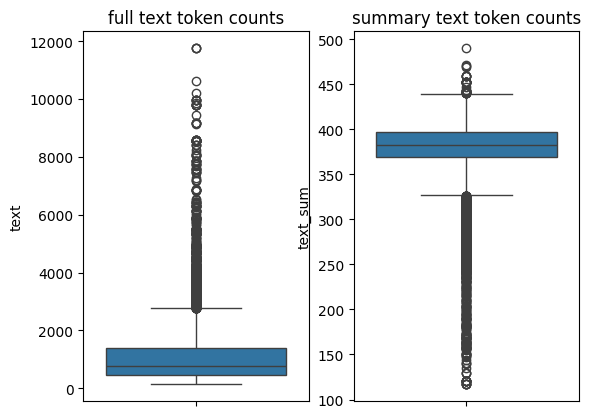

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, AutoTokenizer, AutoModelForSeq2SeqLM


#tokenize the data
tokenizer = AutoTokenizer.from_pretrained("csebuetnlp/mT5_multilingual_XLSum")

text_token_counts = train['text'].apply(lambda x : len(tokenizer.encode(x)))
summary_token_counts = train['text_sum'].apply(lambda x : len(tokenizer.encode(x)))

fig, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot(text_token_counts, ax=ax1)
ax1.set_title('full text token counts')
sns.boxplot(summary_token_counts, ax=ax2)
ax2.set_title('summary text token counts')


**Full-text token counts**

Median: rougly 700 tokens.

IQR: roughly from 300 to 1,200 tokens.

Whiskers: extend up to around 2,600 tokens (so 75% of  articles are under this length).

Outliers: some articles go as high as 10,000–12,000 tokens, but they’re rare.

**Summary token counts**

  Median: rougly 380 tokens.

  IQR: from 3400 up to 400 tokens.

  Whiskers: reach up to 440 tokens.

  Outliers: a few summaries push up to 500 tokens, and some down near 120 tokens.

  




----------------------------
input (text_max_token_len):
 around 1,200–1,500 to cover the majority of articles while keeping GPU memory use reasonable.

Output (summary_max_token_len):
 around 350–400 so we don’t chop off most of  target summaries.

**Define Dataset for training**

Read a row’s text and text_sum

Tokenizes and paddes each row to fixed lengths

Masks padded tokens in the summary labels with -100 so they don’t contribute to loss

Return tensors that the model can understands

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class SummaryDataset(Dataset):
    def __init__(
        self,
        data,
        text_max_token_len = 1200,
        summary_max_token_len = 350
    ):
        self.tokenizer = AutoTokenizer.from_pretrained("csebuetnlp/mT5_multilingual_XLSum")
        self.data = data
        self.text_max_token_len = text_max_token_len
        self.summary_max_token_len = summary_max_token_len

    def __len__(self):
        return len(self.data)

      #tokenize original text
    def __getitem__(self, index: int):
        data_row = self.data.iloc[index]

        text = data_row['text']

        text_encoding = self.tokenizer(
            text,
            max_length=self.text_max_token_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            add_special_tokens=True,
            return_tensors='pt' #return tensor
        )
       #tokenize summary text
        summary_encoding = self.tokenizer(
            data_row['text_sum'],
            max_length=self.summary_max_token_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            add_special_tokens=True,
            return_tensors='pt'
        )
        #mask padding tokens with -100 so loss ignores them
        labels = summary_encoding['input_ids']
        labels[labels == self.tokenizer.pad_token_id] = -100

        return dict(
            input_ids=text_encoding['input_ids'].flatten(),
            attention_mask=text_encoding['attention_mask'].flatten(),
            labels=labels.flatten(),
            decoder_attention_mask=summary_encoding['attention_mask'].flatten()
        )

In [ ]:
!pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 63.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjit

**Lightning DataModule**

loads train.csv/val.csv and creates Dataset objects, builds DataLoaders with chosen batch_size.


In [ ]:
# orgnize and help with training the model
import pytorch_lightning as pl

#define lightning DataModule to wrap data loaders
class SummaryDataModule(pl.LightningDataModule):
    def __init__(self,train_path,val_path,batch_size=12, text_max_token_len = 1200, summary_max_token_len = 400):
        super().__init__()
        self.train_path,self.val_path= train_path,val_path
        self.batch_size = batch_size
        self.text_max_token_len = text_max_token_len
        self.summary_max_token_len = summary_max_token_len

    def setup(self,stage=None):
        train = pd.read_csv(self.train_path)
        val = pd.read_csv(self.val_path)

        #initialize datasets
        self.train_dataset = SummaryDataset(data=train,
                                            text_max_token_len=self.text_max_token_len,
                                            summary_max_token_len=self.summary_max_token_len)
        self.val_dataset = SummaryDataset(data=val,
                                          text_max_token_len=self.text_max_token_len,
                                          summary_max_token_len=self.summary_max_token_len)

    def train_dataloader(self):
        return DataLoader(self.train_dataset,batch_size=self.batch_size,shuffle=True,num_workers=4)

    def val_dataloader(self):
        return DataLoader(self.val_dataset,batch_size=self.batch_size,shuffle=False,num_workers=4)


**Define model**

Define model architecture, training behavior, and optimization

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, AutoTokenizer, AutoModelForSeq2SeqLM
from torch import nn,optim

class T5SumModel(pl.LightningModule):

    def __init__(self, lr=0.0001):
        super().__init__()
        self.lr = lr
        #load pretrained multilingual T5 using 1e-4 lr common for fine tuning
        self.model = AutoModelForSeq2SeqLM.from_pretrained("csebuetnlp/mT5_multilingual_XLSum")
    #forward pass retrun loss
    def forward(self, input_ids, attention_mask, decoder_attention_mask, labels=None):
          #pass inputs to model
        output = self.model(
            input_ids,
            attention_mask=attention_mask,
            labels=labels,
            decoder_attention_mask=decoder_attention_mask
        )
        return output.loss, output.logits
       #transformer standard optimizer
    def configure_optimizers(self):
        return optim.AdamW(self.parameters(), lr=self.lr)


    def training_step(self, batch, batch_size):
      #unpack batch and calculate loss
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']
        decoder_attention_mask = batch['decoder_attention_mask']

        loss, outputs = self(
            input_ids=input_ids,
            attention_mask=attention_mask,
            decoder_attention_mask=decoder_attention_mask,
            labels=labels
        )

        self.log("train_loss", loss, prog_bar=True, logger=True)
        return loss

        #same as training but for valid
    def validation_step(self, batch, batch_size):
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']
        decoder_attention_mask = batch['decoder_attention_mask']

        loss, outputs = self(
            input_ids=input_ids,
            attention_mask=attention_mask,
            decoder_attention_mask=decoder_attention_mask,
            labels=labels
        )

        self.log("val_loss", loss, prog_bar=True, logger=True)
        return loss

#### **Training**

In [ ]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import time

#initialize data and model, then train
dm = SummaryDataModule(train_path="./train.csv",
                val_path = "./val.csv",
                text_max_token_len = 1200,
                batch_size=4)


trained_model = T5SumModel()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

In [ ]:
start_time = time.perf_counter()

#Training
trainer = pl.Trainer( max_epochs=3, default_root_dir='.', callbacks=[EarlyStopping(monitor="val_loss")]) #stops if no improvement
trainer.fit(trained_model,dm)

end_time = time.perf_counter()

#calculate time
elapsed = end_time - start_time
print(f"Time taken: {elapsed:.4f} seconds")

INFO:pytorch_lightning.utilities.rank_zero:Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 -

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


Time taken: 6097.9668 seconds


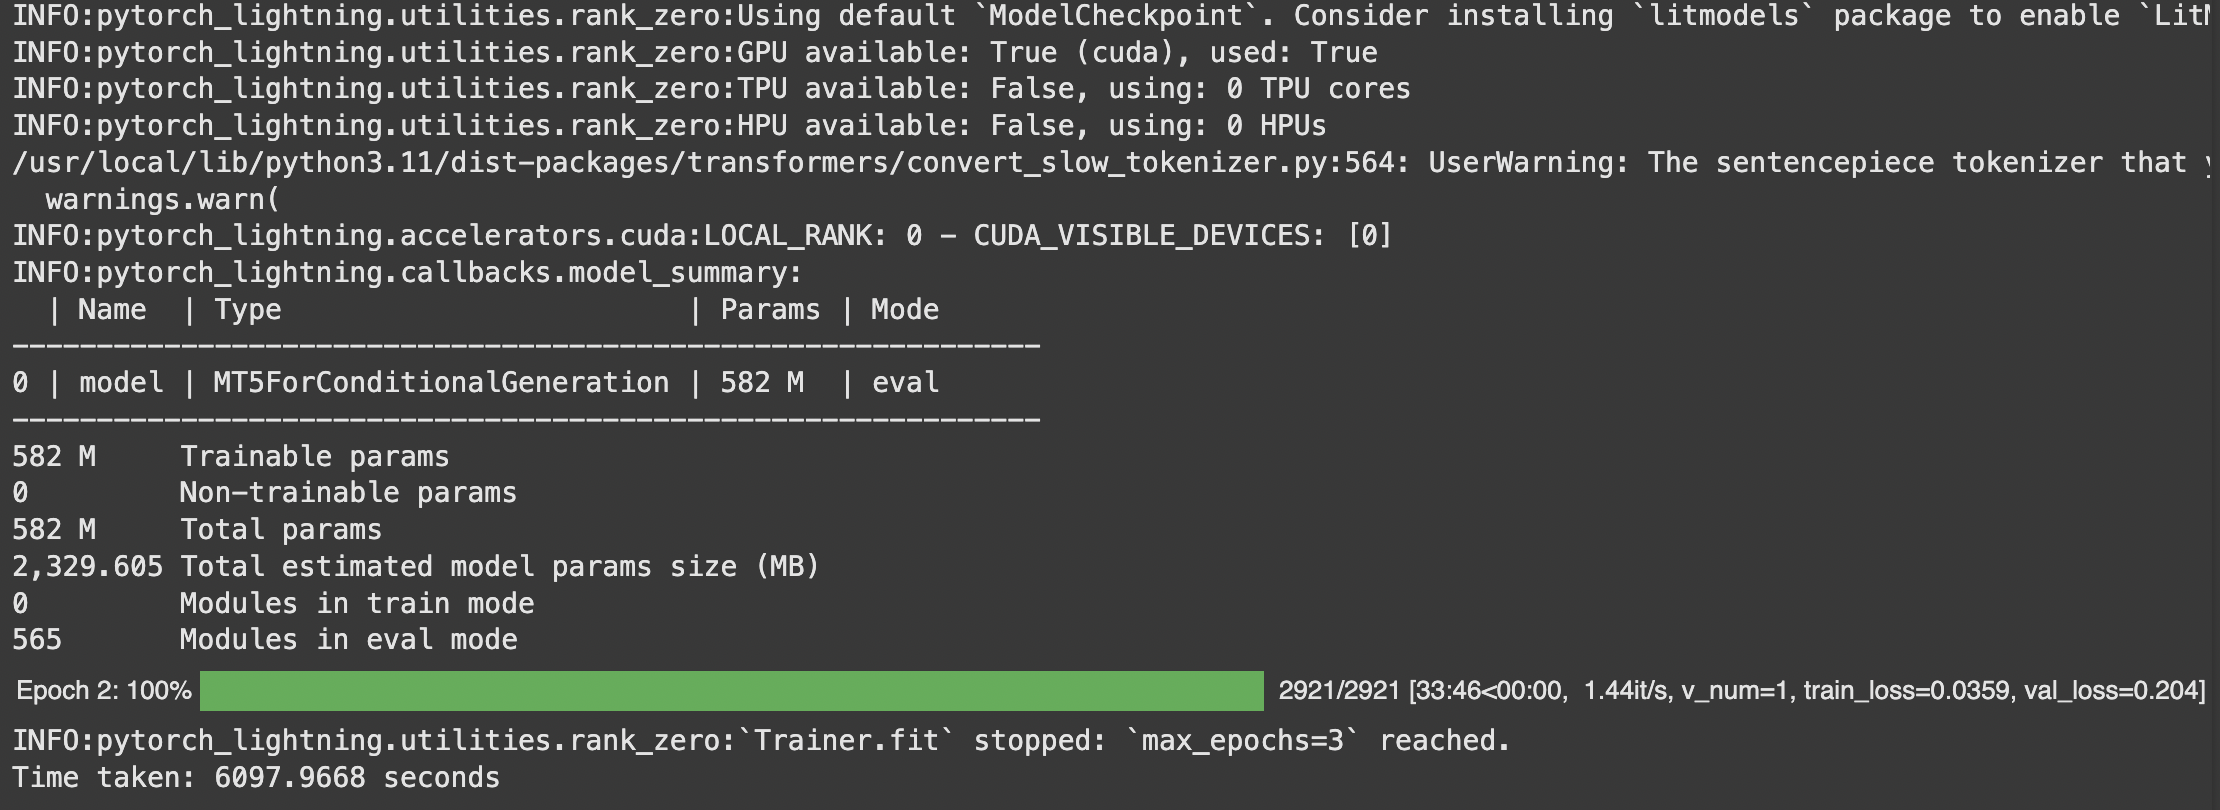

Took about 1 hour and 41 minutes using A100 GPU on google colab PRO

In [ ]:
#save checkpoint
trainer.save_checkpoint("kalimat_t5_finetuned.ckpt")

In [ ]:
# save model
model.save_pretrained("saved_model/")

tokenizer.save_pretrained("saved_model/")

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3464: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 84, 'num_beams': 4, 'length_penalty': 0.6, 'no_repeat_ngram_size': 2}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


('saved_model/tokenizer_config.json',
 'saved_model/special_tokens_map.json',
 'saved_model/spiece.model',
 'saved_model/added_tokens.json',
 'saved_model/tokenizer.json')

In [ ]:
import shutil
shutil.copytree('/content/saved_model', '/content/drive/MyDrive/trans_summ3/saved_model')

'/content/drive/MyDrive/trans_summ3/saved_model'

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, AutoTokenizer, AutoModelForSeq2SeqLM
#load checkpoint and generate a summary
tokenizer = AutoTokenizer.from_pretrained("csebuetnlp/mT5_multilingual_XLSum")
model = T5SumModel.load_from_checkpoint("kalimat_t5_finetuned2.ckpt").model
#inference mode
model.eval()
trained_model.freeze()

def summarizeText(text, mymodel):
  #tokenize input
    text_encoding = tokenizer(
        text,
        max_length=1200,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        add_special_tokens=True,
        return_tensors='pt'
    )
    #generate summary with beam search
    generated_ids = mymodel.generate(
        input_ids=text_encoding['input_ids'],
        attention_mask=text_encoding['attention_mask'],
        max_length=350,
        num_beams=4,
        repetition_penalty=2.5,
        length_penalty=1.0,
        early_stopping=True
    )
    #decode generated tokens
    preds = [
            tokenizer.decode(gen_id, skip_special_tokens=True, clean_up_tokenization_spaces=True)
            for gen_id in generated_ids
    ]
    return "".join(preds)

In [ ]:
x = test['text'].iloc[1]
y = summarizeText(x, model)
print(y)

لماذا ترسخ في ذهننا فاعتقدنا أن المنصب رفاهية وامتياز ومكافأة وغيرها من المسميات التي أضاعت معنى الوظيفة وأضعفت مكانة المسئولية حتى اشرأبت الأعناق إليها وتنافس المتنافسون عليها مع خلو من قدرة حقيقية وبشروط منطقية فاشتغل الأغلب من الناس بها فلا حديث في مجالسهم إلا عن فلان الذي تقلد منصبا لا يستحقه وآخر أعلى من إمكاناته وثالث لولا خداعه وأساليبه الماكرة ما وصل إلى المنصة يسرح بهم الخيال وتتوارد الأفكار وتنسج الخيوط وتحاك الدسائس وتوضع الخطط للوصول كل حسب مناهجه وطرقه حتي العاملون في الوظائف الدنيا يبذلون الجهود في العمل ليس من أجل الأمانة وتحليل الأجر والإخلاص وتقديم خدمات مميزة درجة كبيرة في الأجل وبالمثل في القطاع الخاص هو صاحب الحظ الأوفر كما سيقول منافسوه والحسرة والغيظ يأكل أحشاءهم. ألا يدرك


Took 30 seconds to genrate one summary

#### **Evaluation**

As the model takes too long to genrate the summary, we were not able to genrate for the whole test set. We will choose 200 random samples to get the scores

In [ ]:
_, sample_idx = train_test_split(
    test.index, test_size=200, stratify=test['category_label_x'], random_state=42
)
sample_df = test.loc[sample_idx].reset_index(drop=True)


In [ ]:
sample_df

,text,category_label_x,text_sum
0,كلام امرءه من بني ذكوان في مجلس معاويه عن خالد...,culture,كلام امرأة من بني ذكوان في مجلس معاوية عن خال...
1,سنغافوره د . ب . ء : ءعلن المعهد الدولي للدراس...,international,سنغافورة د. أ : أعلن المعهد الدولي للدراسات ا...
2,العوابي من حمود بن حمد الخروصي : في اطار فعالي...,sports,وقد رعى فعاليات المسابقة الشيخ عبدالله بن موس...
3,الءيام دول بين الناس تعبر عبر الزمان والمكان و...,religion,أما النظرة السطحية العابرة دون النظر والإمعان...
4,نتاءج التنقيبات الءثريه وفيما يتعلق بالدراسات ...,culture,ونجد كذلك استمرارا الأسرار الظلام في كهف بيت ...
...,...,...,...
195,الشوط الثاني الذي خصص للخيول العربيه الاصيله م...,sports,من جانبه اكد معالي الشيخ عامر بن شوين الحوسني...
196,اشبيليه ء . ف . ب : بلغ ريال مدريد المباراه ال...,sports,ب : بلغ ريال مدريد المباراة النهائية من مسابق...
197,ءكرا د . ب . ء : مثل ءعضاء في جماعه المتمردين ...,international,أكرا د. أ : مثل أعضاء في جماعة المتمردين المع...
198,يعتقد بعض المنظرين في الولايات المتحده ءن اندف...,culture,نحن نعرف أن الولايات المتحدة تهتم بدراسات الم...


Process in batches for faster infrence

In [ ]:

#batch processing function
def summarize_batch(texts, batch_size=4):
    device = next(model.parameters()).device
    summaries = []
    #process texts in batches
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(
            batch_texts,
            max_length=1200,
            padding='max_length',
            truncation=True,
            return_tensors='pt',
            return_attention_mask=True
        ).to(device)

        with torch.no_grad():
            generated_ids = model.generate(
                input_ids=inputs['input_ids'],
                attention_mask=inputs['attention_mask'],
                max_length=350,
                num_beams=4,
                repetition_penalty=2.5,
                length_penalty=1.0,
                early_stopping=True
            )

        batch_summaries = tokenizer.batch_decode(
            generated_ids,
            skip_special_tokens=True,
            clean_up_tokenization_spaces=True
        )
        summaries.extend(batch_summaries)
    return summaries

#time
start_time = time.perf_counter()
texts = sample_df['text'].tolist()
sample_df['gen_sum'] = summarize_batch(texts, batch_size=16)
end_time = time.perf_counter()

elapsed = end_time - start_time
print(f"Time taken: {elapsed:.4f} seconds")
print(f"Avg time per text: {elapsed/len(sample_df):.4f} seconds")

Time taken: 7326.1860 seconds
Avg time per text: 36.6309 seconds


To generate 200 summaries it took roughly 2 hours

In [ ]:
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu

#Initialize scorers
scorer = rouge_scorer.RougeScorer(['rouge1'])
bleu_scores = []
rouge_scores = []


#Calculate scores
for ref, gen in zip(sample_df['text_sum'],
                             sample_df['gen_sum'],):
    if pd.notna(ref):

        if pd.notna(gen):
            bleu_scores.append(sentence_bleu([ref.split()], gen.split()))
            rouge_scores.append(scorer.score(ref, gen)['rouge1'].fmeasure)


#compute averages
avg_bleu = sum(bleu_scores) / len(bleu_scores)
avg_rouge = sum(rouge_scores) / len(rouge_scores)



/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [ ]:
#display results
print("Evaluation Results")
print(f" Average BLEU: {avg_bleu:.3f} | Average ROUGE-1: {avg_rouge:.3f}")

Evaluation Results
 Average BLEU: 0.139 | Average ROUGE-1: 0.186


#### **Results and Analysis**

These scores are quite low, and the generation time is too long (2 hours) for 200 samples, so our results are heavily biased and influenced by a small test set. Additionally, we have limited computational power, which forces us to limit the token lengths and train for only a few epochs which could be the reasone to the performance.

**View Sample Output and Save Results**

In [ ]:
sample_df['gen_sum'][1]

'وتستحوذ العروض المسرحية والسينمائية على قسط غير قليل من فاعليات المهرجان اذ تعرض مسرحية ابن الحياة للبناني ميشال اشقر عن حياة الاديب اللبنانى جبران خليل جبراني ويقدم حسين نافع من الاردن مسرح قبعتان ورأس واحد عن رواية لمؤنس الرزاز وتقدم فرقة المعهد العالي للفنون الم سرحية في سوريا موزعة من مصر وفرقة مردوخ من العراق مزاروعة كلمات في الرمل من توانيا وعروض مجرو'

In [ ]:
sample_df['text'][1]

'عمان - ( اف ب ) : افتتحت مساء امس الدورة الثالثة والعشرون لمهرجان جرش للثقافة والفنون الذي يقدم هذا العام باقة من العروض الفنية المتنوعة من غناء وموسيقى ومسرح وسينما وشعر وندوات فكرية تحت شعار ( ويستمر الفرح ) . والمهرجان الذي بدأ امس بحضور العاهل الاردني الملك عبد الله الثاني وملكة الاردن رانيا العبد الله وتتواصل فاعلياته حتى السابع من اغسطس يستضيف نجوما في الغناء العربي منهم الفنان العراقي كاظم الساهر واللبناني ملحم بركات والمصري هاني شاكر الى جانب اليسا ونانسي عجرم من لبنان وديانا كرزون من الاردن . وتشارك فرق عالمية في العروض اذ يقدم مسرح الباليه الروسي عرض بحيرة البجع وتعزف الاوركسترا الرئاسية من كازاخستان واوركسترا جيسينيك سترينغ من تشيكيا الى جانب فريق مونتيفيديو ناتغو من الاوروغواي وفرقة فالينس للرقص من ارمينيا وفرقة الطبول اليابانية . وتحفل امسيات المهرجان بعروض التراث الشعبي بينها فرقة شيوخ الطرب من حلب وفريدة والمقام العراقي والفرقة الشرقية للفن الشعبي من مصر وفرقة نادي الجيل الجديد للفن الشركسي من الاردن كما تحيي فرقة اربد الاردنية للموسيقى العربية امسية خاصة للاغنية النسائ

In [ ]:
sample_df['text_sum'][1]

' وتستحوذ العروض المسرحية والسينمائية على قسط غير قليل من فاعليات المهرجان اذ تعرض مسرحية ابن الحياة للبناني ميشال اشقر عن حياة الاديب اللبناني جبران خليل جبران ويقدم حسين نافع من الاردن مسرحية قبعتان ورأس واحد عن رواية لمؤنس الرزاز وتقدم فرقة المعهد العالي للفنون المسرحية في سوريا مسرحية من هنا وهناك وفرقة مردوخ من العراق مسرحية عطيل الى جانب مسرحية كلمات في الرمل من لتوانيا وعروض مسرحية للاطفال. والمهرجان الذي بدأ امس بحضور العاهل الاردني الملك عبد الله الثاني وملكة الاردن رانيا العبد الله وتتواصل فاعلياته حتى السابع من اغسطس يستضيف نجوما في الغناء العربي منهم الفنان العراقي كاظم الساهر واللبناني ملحم بركات والمصري هاني شاكر الى جانب اليسا ونانسي عجرم من لبنان وديانا كرزون من الاردن. وتحفل امسيات المهرجان بعروض التراث الشعبي بينها فرقة شيوخ الطرب من حلب وفريدة والمقام العراقي والفرقة الشرقية للفن الشعبي من مصر وفرقة نادي الجيل الجديد للفن الشركسي من الاردن كما تحيي فرقة اربد الاردنية للموسيقى العربية امسية خاصة للاغنية النسائية الاردنية. وتشارك فرق عالمية في العروض اذ يقدم مسرح البال

In [ ]:
sample_df

,text,category_label_x,text_sum,gen_sum
0,دبي من محمد بن سعيد : تبحث مؤسسة الديسم للتجار...,economy,وأشار القرشي الى أن مؤسسة الديسم الكويتية تعم...,وأشار القرشي الى أن مؤسسة الديسم الكويتية تعمل...
1,عمان - ( اف ب ) : افتتحت مساء امس الدورة الثال...,culture,وتستحوذ العروض المسرحية والسينمائية على قسط غ...,وتستحوذ العروض المسرحية والسينمائية على قسط غي...
2,اتى رجل ابراهيم بن ادهم رحمه الله تعالى فقال :...,religion,يوم الى الليل قال وهب بن منبه : مر نبي من الا...,يوم الى الليل قال وهب بن منبه : مر نبي من الان...
3,ضمن آلاف المشاهد التي تطحن عقول المشاهدين يومي...,culture,يجب الوقوف أيضا على تصريح الجيش الأميركي عن ت...,نقف عند تلك الصور التي بثتها التلفزة العالمية ...
4,الإنجازات والمشاركات أيضا تحدثنا الطالبة سلطان...,local,الإنجازات والمشاركات أيضا تحدثنا الطالبة سلطا...,صحيح الإنسان يفرح لكن هذه الفرحة تختلف فلها نك...
...,...,...,...,...
195,كتب أحمد البطاشي : احتفلت وزارة التربية والتعل...,local,سلامة المسيرة التربوية بعدها قدمت مجموعة من ا...,كتب أحمد البطاشي : احتفلت وزارة التربية والتعل...
196,عقد سعادة المهندس عبدالله بن عباس بن احمد رئيس...,local,وقد تم خلال الاجتماع استعراض ورقة عمل اعدتها ...,وقد تم خلال الاجتماع استعراض ورقة عمل اعدتها ا...
197,جولات تفتيشية وعن دور بلدية مسقط في متابعة تطب...,local,طعام صحي كما اشارت كذلك الى ضرورة الاعتناء بط...,كما اشار الى انه يتم القيام بجولات تفتيشية دور...
198,متابعة خالد العامري : تواصلت امس بجامعة السلطا...,local,كما يناقش المؤتمر مواضيع متنوعة حول امراض واص...,كما يناقش المؤتمر مواضيع متنوعة حول امراض واصا...


### **Task 2: Text Summarization - AraT5 Arabic Text Summarization**
We use the AraT5 Arabic Text Summarization model, specifically a version fine-tuned for Arabic summarization. The process includes preprocessing Arabic texts for normalization, generating summaries with the model, and evaluating them against references using ROUGE-1 and BLEU metrics.

This sequence-to-sequence model produces concise summaries from longer Arabic texts by capturing their key ideas.

In [ ]:
!pip install transformers torch arabert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 121.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.4 MB/s eta 0:00:

#### **Load and Initialize Model**

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
from arabert.preprocess import ArabertPreprocessor
import torch

#load the arabic T5 summarization model and tokenizer
model_name="malmarjeh/t5-arabic-text-summarization"
preprocessor = ArabertPreprocessor(model_name="")

#load the model tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

pipeline = pipeline("text2text-generation",model=model,tokenizer=tokenizer)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/335 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/679 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/2.44M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


pytorch_model.bin:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
import pandas as pd
df = pd.read_csv('/content/sum_tf_200')

Read 200 samples from a CSV file

#### **Generate Summaries**

This code preprocesses each text in the dataset, generates summaries using the T5 model with controlled length and repetition settings, and records the time taken. The generated summaries are then added to df

In [ ]:
#empty list to store summaries
summaries = []


#loop through text in df
start_time = time.perf_counter()
for text in df['text_clean']:
    #preprocess the text
    processed_text = preprocessor.preprocess(text)

    # Generate summary
    result = pipeline(
        processed_text,
        pad_token_id=tokenizer.eos_token_id,
            num_beams=3,
            repetition_penalty=3.0,
            max_length=350,
            min_length=100,
            length_penalty=1.0,
        early_stopping=True
    )[0]['generated_text']

    #add result to the list
    summaries.append(result)

end_time = time.perf_counter()

#add the summaries to df (gen_sum)
df['gen_sum'] = summaries


elapsed = end_time - start_time
print(f"Time taken: {elapsed:.4f} seconds")

Both `max_new_tokens` (=256) and `max_length`(=350) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=350) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=350) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=350) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Time taken: 3901.3208 seconds


In [ ]:
elapsed = end_time - start_time
print(f"Time taken: {elapsed:.4f} seconds")
print(f"Avg time per text: {elapsed/len(df):.4f} seconds")

Time taken: 3901.3208 seconds
Avg time per text: 19.5066 seconds


Took about 65 min and about 20 sec for each one using T4-GPU

In [ ]:
df

,text,category_label_x,filename_label,text_sum,category_label_y,text_clean,text_sum_clean,generated_summary_20,generated_summary_30,gen_sum
0,أحسك\nحزن\nالارض\nتنداح\nدمعة\nعلى\nوجنات\nالل...,culture,culturecmar1338,أحسك\n حزن\n الارض\n تنداح\n دمعة\n على\n وجن...,culture,أحسك حزن الارض تنداح دمعة على وجنات الليل والل...,أحسك حزن الارض تنداح دمعة على وجنات الليل والل...,أحسك حزن الارض تنداح دمعة على وجنات الليل والل...,أحسك حزن الارض تنداح دمعة على وجنات الليل والل...,"الحزن في سماء السماء ل "" نور السلام "" و "" الحي..."
1,تدشن\nشرطة\nعمان\nالسلطانية\nالاثنين\nالمقبل\n...,local,localcapr158,آلية\n وبالنسبة\n للآلية\n أو\n الكيفية\n الت...,local,تدشن شرطة عمان السلطانية الاثنين المقبل خدمة ا...,آلية وبالنسبة للآلية أو الكيفية التي سيتمكن به...,آلية وبالنسبة للآلية أو الكيفية التي سيتمكن به...,آلية وبالنسبة للآلية أو الكيفية التي سيتمكن به...,« إسعاف عمان » توفر خدمة الإسعاف في جميع حوادث...
2,واقع\nالأمة\nالإسلامية\nوأكد\nد\n.\nداود\nأن\n...,religion,religioncjul1075,وأوضح\n أن\n اختياره\n للشيخ\n الغزالي\n نموذ...,religion,واقع الأمة الإسلامية وأكد د . داود أن الشيخ ال...,وأوضح أن اختياره للشيخ الغزالي نموذجا للداعية ...,وأوضح أن اختياره للشيخ الغزالي نموذجا للداعية ...,وأوضح أن اختياره للشيخ الغزالي نموذجا للداعية ...,« فقيه الأولويات » يكشف عن واقع الأمة العربية ...
3,مدريد\nا\n.\nف\n.\nب\n:\nتنتظر\nالمتهمين\nالار...,international,internationalcmar1391,مدريد\n ا. ب\n :\n تنتظر\n المتهمين\n الاربعة...,international,مدريد ا . ف . ب : تنتظر المتهمين الاربعة الجدد...,مدريد ا. ب : تنتظر المتهمين الاربعة الجدد الذي...,ب : تنتظر المتهمين الاربعة الجدد الذين قرر الق...,ب : تنتظر المتهمين الاربعة الجدد الذين قرر الق...,السجن 40 عاما ل 4 متهمين ب « اعتداءات مدريد » ...
4,يدشن\nمعالي\nالدكتور\nمحمد\nبن\nحمد\nالرمحي\nو...,economy,economycdec607,فيما\n سيتم\n تسليم\n الفائزين\n الآخرين\n جو...,economy,يدشن معالي الدكتور محمد بن حمد الرمحي وزير الن...,فيما سيتم تسليم الفائزين الآخرين جوائزهم عبر ص...,فيما سيتم تسليم الفائزين الآخرين جوائزهم عبر ص...,فيما سيتم تسليم الفائزين الآخرين جوائزهم عبر ص...,« عمان للاتصالات » تدشن خدمة المشترك الرقمي ال...
...,...,...,...,...,...,...,...,...,...,...
195,هل\nيستطيع\nالشباب\nاليوم\nتحقيق\nما\nاستحال\n...,sports,sportscapr1294,هل\n يستطيع\n الشباب\n اليوم\n تحقيق\n ما\n ا...,sports,هل يستطيع الشباب اليوم تحقيق ما استحال عليه في...,هل يستطيع الشباب اليوم تحقيق ما استحال عليه في...,هل يستطيع الشباب اليوم تحقيق ما استحال عليه في...,هل يستطيع الشباب اليوم تحقيق ما استحال عليه في...,شباب الشباب يحتاج إلى دعم كبير من المراس في مو...
196,2\n:\n.\n.20040113.1\n_\n3\n.\n250\n237\nسلطان...,sports,sportscjan962,وتحدث\n عن\n عودة\n منتخب\n العراق\n قائلا\n ...,sports,2 : . .20040113.1 _ 3 . 250 237 سلطان بن فهد :...,وتحدث عن عودة منتخب العراق قائلا المنتخب العرا...,وتحدث عن عودة منتخب العراق قائلا المنتخب العرا...,وتحدث عن عودة منتخب العراق قائلا المنتخب العرا...,سلطان بن فهد يؤكد نجاح « خليجي 16 » بعد عودة م...
197,القاهرة\nمن\nمحمد\nعمر\n:\nأصدرت\nأميركا\nمؤخر...,religion,religioncapr1344,القاهرة\n من\n محمد\n عمر\n :\n أصدرت\n أميرك...,religion,القاهرة من محمد عمر : أصدرت أميركا مؤخرا قانون...,القاهرة من محمد عمر : أصدرت أميركا مؤخرا قانون...,فلا يكلف الله نفسا إلا وسعها لكن أن يجد الإنسا...,فلا يكلف الله نفسا إلا وسعها لكن أن يجد الإنسا...,قانون أميركي يسمح بعلاج المرضى المئوسين من شفا...
198,ليست\nهذه\nدروس\n(\nمحو\nالأمية\n)\nفالقراءة\n...,religion,religioncjan1088,لأنك\n قد\n تريد\n ملعومات\n نشرت\n في\n عام\...,religion,ليست هذه دروس ( محو الأمية ) فالقراءة مثل أي ش...,لأنك قد تريد ملعومات نشرت في عام قديم أو حديث ...,لأنك قد تريد ملعومات نشرت في عام قديم أو حديث ...,لأنك قد تريد ملعومات نشرت في عام قديم أو حديث ...,7 خطوات للقراءة الصحيحة في كتاب « محو الأمية »...


 Evaluate the summaries against reference summaries using ROUGE-1 and BLEU scores.

In [ ]:
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu

#Initialize scorers
scorer = rouge_scorer.RougeScorer(['rouge1'])
bleu_scores = []
rouge_scores = []


#Calculate scores
for ref, gen in zip(df['text_sum'],
                             df['gen_sum'],):
    if pd.notna(ref):

        if pd.notna(gen):
            bleu_scores.append(sentence_bleu([ref.split()], gen.split()))
            rouge_scores.append(scorer.score(ref, gen)['rouge1'].fmeasure)


#compute averages
avg_bleu = sum(bleu_scores) / len(bleu_scores)
avg_rouge = sum(rouge_scores) / len(rouge_scores)

/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [ ]:
#display results
print("Evaluation Results")
print(f" Average BLEU: {avg_bleu:.3f} | Average ROUGE-1: {avg_rouge:.3f}")

Evaluation Results
 Average BLEU: 0.005 | Average ROUGE-1: 0.095


#### **Results and Analysis**

Due to the long generation time, we limited the evaluation to 200 random samples. Generating summaries for these took about **65 minutes**, with an average of **19.5 seconds per text**.

The model achieved a **ROUGE-1 score of 0.095** and a **BLEU score of 0.005**, which are quite low. These results are likely affected by the small sample size, limited token length, and lack of fine-tuning. In addition, restricted computational resources prevented longer training and full dataset evaluation, which may have impacted the model’s performance.


**View Sample Output and Save Results**

In [ ]:
df['gen_sum'][1]

'« إسعاف عمان » توفر خدمة الإسعاف في جميع حوادث الطرق خلال 10 دقائق من العمل والاستجابة للحوادث الطارئة بلسلطنة وعمان و 5 مناطق جديدة على طريق دبي - عمان العام المقبل " اليوم الأول " إلى مطار عمان الدولي الاثنين الجاري بدبي بعد 4 سنوات من عملها الابتكاري الجديد لعام 2020 ومتجاوزة الظروف الصحية السائدة منذ 1996 حتى عام 2030 باللمسة الأولى عند الاستجابة للحوادث السريعة بسبب الحوادث اليومية العالمية الكبرى قبل انتهاء الأعمال اللازمة لها مع وصول المصابين الى المستشفيات المحلية الدولية أو أخرى الأخرى عن بعد "'

In [ ]:
df['text_clean'][1]

'تدشن شرطة عمان السلطانية الاثنين المقبل خدمة الإسعاف بالسلطنة وسوف يتم البدء بتقديم هذه الخدمة في نطاق محافظة مسقط من خلال ( 6 ) مراكز إسعاف ثابتة وسوف يتبع ذلك افتتاح بقية المراكز تباعا في وقت لاحق ويأتي تدشين هذه الخدمة بالسلطنة من أجل تقديم خدمة صحية أولية طارئة تخدم في المقام الأول المصابين في حوادث الطرق . ولتسليط الضوء حول هذا الموضوع إلتقينا بالرائد علي بن محمد الرمضاني آمر وحدة خدمات الإسعاف الذي يقول : الإنسان أينما وجد معرض للحوادث والإصابات الطارئة فهو إذا بحاجة إلى مساعدة وإسعاف نفسه ومساعدة ( إسعاف ) الأخرين . ومع تقدم الحضارة وتعقد ظروف الحياة ازدادت الحوادث الطارئة والإصابات المختلفة وكثير من تلك الحالات يتطلب عملا فوريا . فالعناية بالمصاب وإسعافه بطريقة عملية صحيحة كما هو الحال في إصابات حوادث السير تساعد في إنقاذ حياته ونجاح علاجه وتقصير فترة بقائه في المستشفى . وإذا أوجزنا تعريفا للإسعاف نستطيع أن نقول هو ( لمساعدة أو المعالجة الفورية ) ويقصد به كذلك المحافظة على حياة المصاب و الحيلولة دون تفاقم إصابته أو حالته سوءا . هنا تكمن قيمة التدريب و التأهيل المتقدم للمسعف أو

In [ ]:
# Save the summarized texts along with the original data into a new CSV file
df.to_csv('sum_arat5_200', index = False)

## **Comparative Analysis -  Traditional and Modern approaches**

### **1- Task 1: Text Classification**



#### **A. Performance comparison across all methods**



**Quantitative Metrics Comparison:**

The traditional SVM, deep learning (CNN), and transformer-based (AraBERT) on Arabic text classification using metrics such as accuracy and F1-scores. Overall, AraBERT achieved the best results, followed closely by SVM, while CNN performed the weakest. The evaluation also considered class-wise performance and highlighted challenges in handling imbalanced categories. Confusion matrices for each model further revealed that while major classes like sports and religion were classified with high accuracy, minority classes such as culture and international news posed greater difficulty.

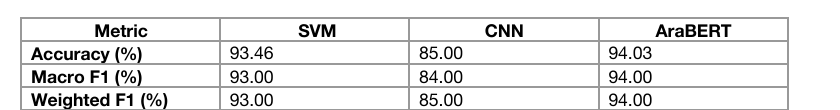


**Visualization**

<ipython-input-1-88cd00df5e93>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0,0], x='Model', y='Accuracy', data=df, palette='Blues')
<ipython-input-1-88cd00df5e93>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1,0], x='Model', y='Train Time (min)', data=df, palette='Reds')


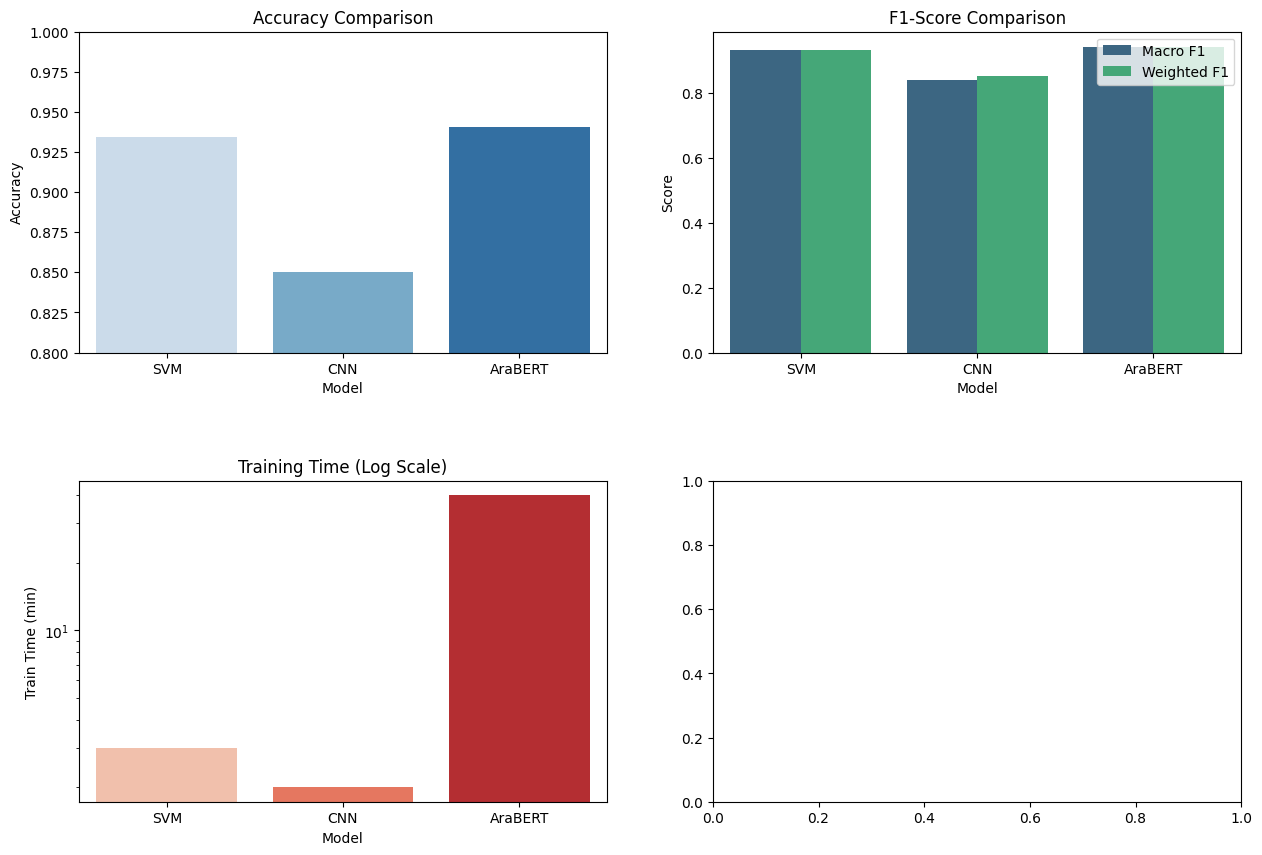

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
metrics = {
'Model': ['SVM', 'CNN', 'AraBERT'],
'Accuracy': [0.9345, 0.85, 0.9403],
'Macro F1': [0.93, 0.84, 0.94],
'Weighted F1': [0.93, 0.85, 0.94],
'Train Time (min)':[3,2,40]

}
df = pd.DataFrame(metrics)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4)

# Accuracy
sns.barplot(ax=axes[0,0], x='Model', y='Accuracy', data=df, palette='Blues')
axes[0,0].set_ylim(0.8, 1.0)
axes[0,0].set_title('Accuracy Comparison')

# F1 Scores
df_f1 = df.melt(id_vars='Model', value_vars=['Macro F1', 'Weighted F1'],
var_name='Metric', value_name='Score')
sns.barplot(ax=axes[0,1], x='Model', y='Score', hue='Metric', data=df_f1, palette='viridis')
axes[0,1].set_title('F1-Score Comparison')
axes[0,1].legend(loc='upper right')

# Training Time
sns.barplot(ax=axes[1,0], x='Model', y='Train Time (min)', data=df, palette='Reds')
axes[1,0].set_yscale('log')
axes[1,0].set_title('Training Time (Log Scale)')
plt.show()

####**B. Trade-off analysis**





*   **Accuracy and Performance**

  **AraBERT** had the best performance with an accurate score of 94.03% and an F1-score of 0.94. It did very well in categories like economy, culture, and religion, which shows it understands Arabic better. **SVM** came close with 93.45% accuracy and a 0.93 F1-score, performing strongly in all categories, especially in sports (0.99) and religion (0.98). **CNN** had the lowest results, with 85% accuracy and a 0.84 F1-score, and it struggled more in culture and economy.

  In general, **AraBERT** handles the complexity of Arabic more effectively, while traditional models like **SVM** work well for simpler tasks.
<br><br>
*   **Computational requirements and training time**

  **CNN** was the faster to train with only 2 min followed by **SVM** with 3 min on CPU whice also was fast and finally **AraBERT** required the longest training time. 10 hours without a GPU, but 45 minutes when using a T4 GPU.
<br><br>
*  **Model complexity and interpretability**

   **SVM** was the simplest and easiest to use. **AraBERT** was easier to apply compared to **CNN** because of tools like Hugging Face which simplify the process. But **CNN** was more difficult, because it needed more steps like building layers.
<br><br>
* **Handling of Arabic-specific linguistic features challenges**

 **SVM** uses TF-IDF, and **CNN** uses word embeddings, but they don’t fully understand Arabic grammar, on the other hand **AraBERT** is pre-trained on large Arabic datasets, so it understands the language better including things like word forms.



#### **C. Best practices and recommendations**

**Exceled Scenarios for Each Approach**

**SVM:**
*   Limited computational power.
*   Short training time.
*   Good overall results

**CNN:**

*   Short training time.

**AraBERT:**
*   High accuracy.
*   Contextual understanding
*   Arabic’s rich morphology  is better handled by transformers.
*   Outperformed others on minority classes.
<br><br>

**Recommendations**
*   Use SVM when there is limited computational power, but if you have computational power AraBERT has
much better results.
<br><br>

**Hybrid Approaches**
*   Use AraBERT to generate embeddings, then train SVM classifier on top.

### **2- Task 2: Text Summarization**


#### **A. Performance comparison across all methods**


**Average BLEU & ROUGE-1 Comparison**



*   TF-IDF (0.3) shows the highest scores (BLEU ≈ 0.483, ROUGE-1 ≈ 0.324), closely followed by TF-IDF (0.2) (BLEU ≈ 0.457, ROUGE-1 ≈ 0.308).

*   Both neural models perform substantially:

  o	mT5 (XL-Sum) achieves BLEU ≈ 0.139, ROUGE-1 ≈ 0.186.

  o	AraT5 performs lowest (BLEU ≈ 0.005, ROUGE-1 ≈ 0.095).

**Average Generation Time per Summary**

- TF-IDF approaches require essentially negligible time (≈ 0.0023 s per summary).

- In contrast, mT5 (XL-Sum) takes ≈ 36.63 s per summary, and AraT5 takes ≈ 19.51 s per summary.

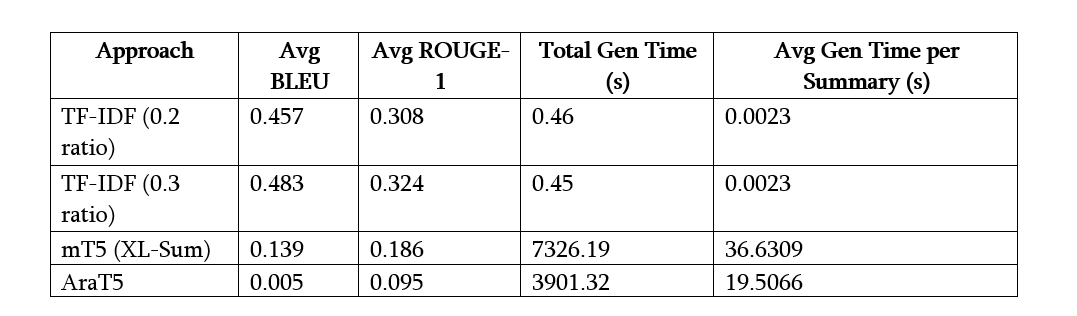

**Visualization**

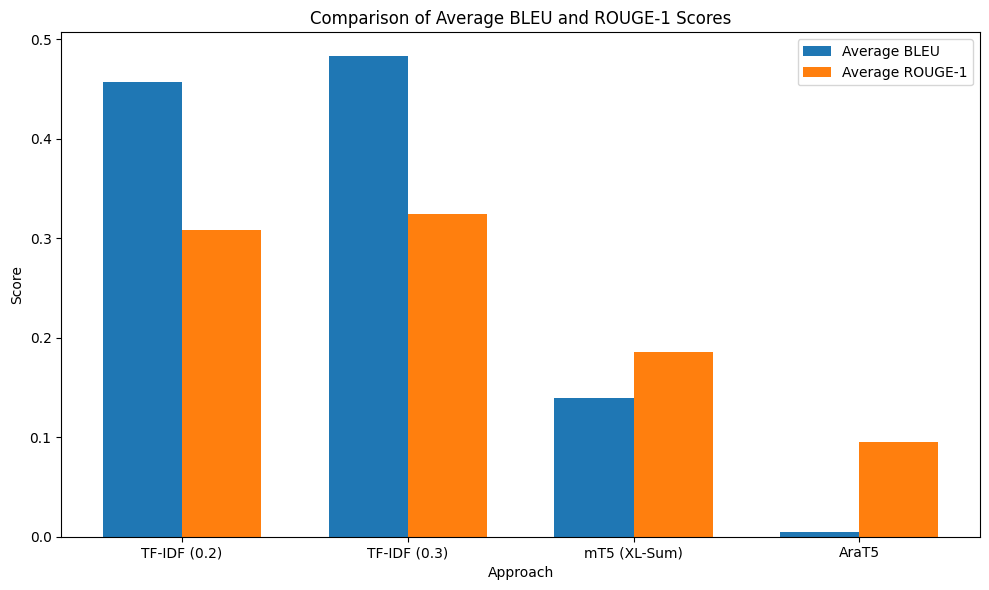

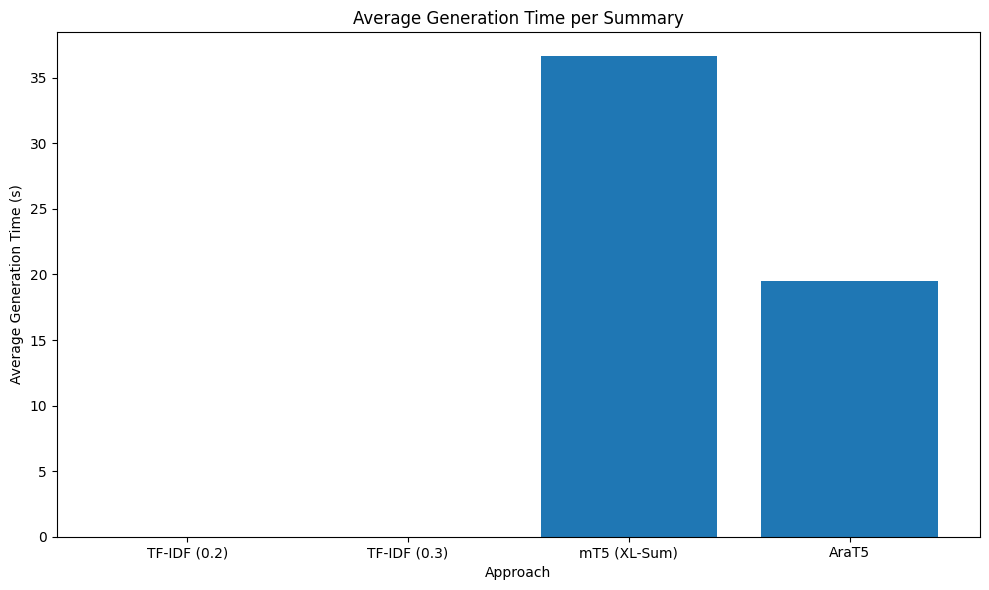

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# build df with metrics result
data = {
    'Approach': ['TF-IDF (0.2)', 'TF-IDF (0.3)', 'mT5 (XL-Sum)', 'AraT5'],
    'Average BLEU': [0.457, 0.483, 0.139, 0.005],
    'Average ROUGE-1': [0.308, 0.324, 0.186, 0.095],
    'Avg Gen Time per Summary (s)': [0.46/200, 0.45/200, 7326.1860/200, 3901.3208/200],
    'Total Gen Time (s)': [0.46, 0.45, 7326.1860, 3901.3208]
}

df = pd.DataFrame(data)

#plotting average BLEU and ROUGE-1 as grouped bars
fig, ax = plt.subplots(figsize=(10, 6))
index = range(len(df))
bar_width = 0.35

ax.bar([i - bar_width/2 for i in index], df['Average BLEU'], bar_width, label='Average BLEU')
ax.bar([i + bar_width/2 for i in index], df['Average ROUGE-1'], bar_width, label='Average ROUGE-1')

ax.set_xlabel('Approach')
ax.set_ylabel('Score')
ax.set_title('Comparison of Average BLEU and ROUGE-1 Scores')
ax.set_xticks(index)
ax.set_xticklabels(df['Approach'])
ax.legend()

plt.tight_layout()
plt.show()

# plotting average gen time per sum
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df['Approach'], df['Avg Gen Time per Summary (s)'])
ax.set_xlabel('Approach')
ax.set_ylabel('Average Generation Time (s)')
ax.set_title('Average Generation Time per Summary')
plt.tight_layout()
plt.show()

####**B. Trade-off analysis**




* **Accuracy and Performance**

**TF-IDF** had the best results in automatic metrics.

* BLEU ≈ 0.48 and ROUGE-1 ≈ 0.32.
* It extracts key sentences based on word frequency, which works well with structured texts like news.

**mT5** and **AraT5** had lower scores:
* mT5: BLEU ≈ 0.14, ROUGE-1 ≈ 0.18
* AraT5: BLEU ≈ 0.005, ROUGE-1 ≈ 0.095
* They generate more human-like summaries, but don’t always match reference summaries, which lowers their scores.



Overall, **TF-IDF** wins on evaluation metrics, but transformer models may sound more natural.
<br><br>

**Computational Requirements and Training Time**

**TF-IDF** is extremely fast and needs no training.
* Processes each summary in 0.002 seconds.


**mT5** and **AraT5** are very slow.
* mT5 took 1.5+ hours to fine-tune (on A100 GPU), 36 seconds per summary at test time.
* AraT5 took  19 seconds per summary, and fine-tuning take 65 min.

Use **TF-IDF** for speed. Use **mT5/AraT5** only if you can afford the time and hardware.
<br><br>

**Model Complexity and Interpretability**

**TF-IDF** is very simple and explainable.
* You can see which sentences were picked and why.

**mT5/AraT5** are complex models.
* Hard to explain why a summary was generated or why something was left out.
* Debugging is difficult.
<br><br>

**Handling of Arabic-Specific Linguistic Features**

**TF-IDF** doesn’t understand Arabic grammar.
* Needs extra steps like stemming and normalization to work well.


**mT5** and **AraT5** are better for Arabic.
* mT5 is trained on many languages.
* AraT5 is trained on Arabic and knows its grammar and word forms better.
* But still needs fine-tuning to perform well on specific domains.


#### **C. Best practices and recommendations**


**TF-IDF:**

* Works with low computational power.
* No model training required.
* Gives quick, decent summaries.
- Suitable for structured texts like news articles where key facts are stated explicitly
<br><br>

**mT5 / AraT5:**

* Rewrites text (abstractive).
* Good with noisy or messy text.
* mT5 supports many languages (can summarize across 44 languages)
* Handles Arabic grammar well.
<br><br>

**Recommendations**

* Use TF-IDF for fast and simple summaries.
* Use mT5/AraT5 for better-quality summaries or complex texts.
<br><br>

**Hybrid Approaches**

* Use TF-IDF to pick key sentences.
* Then use AraT5 to rewrite them in a better way.

## **Conclusion**

This project presented a comparative study of traditional and modern NLP approaches for Arabic text classification and summarization using the Kalimat dataset. Results showed that transformer-based models like AraBERT and mT5 outperform traditional methods in terms of accuracy and language understanding, especially for handling Arabic’s rich morphology. However, traditional approaches like SVM and TF-IDF still offer strong performance with much lower computational cost and simpler implementation. Each approach has its strengths: SVM and TF-IDF are fast and interpretable, while AraBERT and mT5 excel in contextual understanding. Hybrid methods combining both can offer balanced solutions. Overall, choosing the best method depends on task complexity, computational resources, and language nuances.


## **Interactive Demo**  

This web demonstrates Arabic Natural Language Processing (NLP) capabilities by performing text classification and summarization. It integrates both traditional machine learning (TF-IDF, SVM) and modern transformer-based models (AraBERT for classification, T5 for summarization). Users can input Arabic text and receive both classification results and summarized versions using different approaches for comparison. The application provides a simple and interactive interface built with Flask.

In [ ]:
!pip install flask transformers torch pyngrok scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install transformers arabert rouge-score nltk pyngrok flask sentencepiece
!python -m nltk.downloader punkt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.3 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186456 sha256=7929a92c4a4ef22373c99a534cc3f2e80f9dbdf38c4562f2fac89bd67f0c64fd
  Stored in directory: /root/.cache/pip/wheels/94/08/b4/78657b1541bb704b088317b52429ee4016d9888fe47dbb130f
Successfully built emoji
<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from flask import Flask, request, render_template_string
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import T5Tokenizer, T5ForConditionalGeneration, AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
from arabert.preprocess import ArabertPreprocessor
from pyngrok import ngrok
from flask import send_from_directory
import torch
import pickle
import re
import numpy as np
import pandas as pd
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu
import time

# Flask app initialization
app = Flask(__name__)
app.view_functions.clear()

# Mount Google Drive to access saved models
from google.colab import drive
drive.mount('/content/drive')

# Load AraBERT
arabert_dir = "/content/drive/MyDrive/saved_model2"
tokenizer = AutoTokenizer.from_pretrained(arabert_dir)
model = AutoModelForSequenceClassification.from_pretrained(arabert_dir)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Load SVM
svm_path = "/content/drive/MyDrive/saved_svm_model"
with open(f"{svm_path}/svm_model.pkl", "rb") as f:
    svm_model = pickle.load(f)

with open(f"{svm_path}/tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

with open(f"{svm_path}/label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

# Load traditional TF-IDF
summarizer_path = "/content/drive/MyDrive/saved_summarizer_t"
with open(f"{summarizer_path}/tfidf_vectorizer.pkl", "rb") as f:
    summarizer_tfidf = pickle.load(f)

# Load T5 Transformer Summarizer
t5_model_path = "/content/drive/MyDrive/trans_summ3/saved_model/"
t5_tokenizer = AutoTokenizer.from_pretrained(t5_model_path)
t5_model = AutoModelForSeq2SeqLM.from_pretrained(t5_model_path).to(device)
t5_model.eval()

# Load Arabic T5 summarization
model_name = "malmarjeh/t5-arabic-text-summarization"
arabert_preprocessor = ArabertPreprocessor(model_name="")
arabic_tokenizer = AutoTokenizer.from_pretrained(model_name)
arabic_model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
summarization_pipeline = pipeline(
    "text2text-generation",
    model=arabic_model,
    tokenizer=arabic_tokenizer,
    device=0 if torch.cuda.is_available() else -1
)

# Define functions
def predict_bert(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        prediction = torch.argmax(outputs.logits, dim=1).item()
    return model.config.id2label[prediction]

def predict_svm(text):
    text_vector = tfidf_vectorizer.transform([text])
    prediction = svm_model.predict(text_vector)
    return label_encoder.inverse_transform(prediction)[0]

def summarize_tfidf(text, tfidf, ratio=0.2):
    sentences = [s.strip() for s in re.split(r'[.؟!\n]+', text) if s.strip()]
    if len(sentences) <= 1:
        return text
    tfidf_matrix = tfidf.fit_transform(sentences)
    scores = np.array(tfidf_matrix.sum(axis=1)).flatten()
    n = max(1, int(len(sentences) * ratio))
    top_idx = scores.argsort()[-n:][::-1]
    return ' '.join(np.array(sentences)[top_idx])

def summarize_transformer(text, mymodel):
    text_encoding = t5_tokenizer(
        text,
        max_length=1200,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        add_special_tokens=True,
        return_tensors='pt'
    )
    generated_ids = mymodel.generate(
        input_ids=text_encoding['input_ids'],
        attention_mask=text_encoding['attention_mask'],
        max_length=350,
        num_beams=4,
        repetition_penalty=2.5,
        length_penalty=1.0,
        early_stopping=True
    )
    preds = [
        t5_tokenizer.decode(gen_id, skip_special_tokens=True, clean_up_tokenization_spaces=True)
        for gen_id in generated_ids
    ]
    return "".join(preds)

def summarize_with_arabic_t5(text):
    processed_text = arabert_preprocessor.preprocess(text)
    result = summarization_pipeline(
        processed_text,
        pad_token_id=arabic_tokenizer.eos_token_id,
        num_beams=3,
        repetition_penalty=3.0,
        max_length=350,
        min_length=100,
        length_penalty=1.0,
        early_stopping=True
    )[0]['generated_text']
    return result

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/335 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/679 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/2.44M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


pytorch_model.bin:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# HTML template
html_template = """
<!DOCTYPE html>
<html dir="rtl" lang="ar">
<head>
    <meta charset="UTF-8">
    <title>تصنيف وتلخيص النص العربي</title>
    <style>
      body {
        background:
          linear-gradient(rgba(255,255,255,0.85), rgba(255,255,255,0.85)),
          url('https://lh3.googleusercontent.com/d/1EVpoJvUrVvu4D4tPL4MBsn_fiKBtSNwd=w1920-h1080') no-repeat center center fixed;
        background-size: cover;
        font-family: 'Arial', sans-serif;
        margin: 0;
        padding: 20px;
      }

      h1, h2 {
        text-align: center;
        color: #2c3e50;
      }

      form {
        max-width: 800px;
        margin: auto;
      }

      textarea {
        width: 100%;
        height: 250px;
        padding: 15px;
        font-size: 18px;
        border-radius: 10px;
        border: 1px solid #ccc;
        box-shadow: 0 2px 5px rgba(0,0,0,0.1);
      }

      button {
        padding: 12px 25px;
        font-size: 16px;
        margin: 10px 5px;
        border: none;
        border-radius: 8px;
        background-color: #f39c12;
        color: white;
        cursor: pointer;
        transition: background-color 0.3s ease;
      }

      button:hover {
        background-color: #e67e22;
      }

      .result {
        max-width: 800px;
        margin: 30px auto;
        padding: 20px;
        background-color: rgba(255, 255, 255, 0.9);
        color: #000;
        font-size: 18px;
        border-radius: 10px;
        box-shadow: 0 4px 10px rgba(0,0,0,0.15);
        line-height: 1.7;
      }

      .summary-box {
        padding: 15px;
        margin: 15px 0;
        border-radius: 8px;
        background-color: rgba(255, 165, 0, 0.3);
      }

      .method-title {
        font-weight: bold;
        color: #e74c3c;
        margin-bottom: 8px;
        padding-bottom: 5px;
        border-bottom: 1px solid #ccc;
      }
    </style>
</head>
<body>

    <h1>Exploring Arabic NLP Tasks</h1>
    <h2>مشروع تصنيف وتلخيص النصوص العربية</h2>

    <form method="POST">
        <textarea name="user_input" placeholder="أدخل النص العربي هنا..."></textarea><br>
        <button type="submit" name="action" value="classify">تصنيف النص</button>
        <button type="submit" name="action" value="summarize">تلخيص النص</button>
    </form>

    {% if original_text %}
    <div class="result">
        <h3>النتائج</h3>

        <div>
            <strong>النص الأصلي:</strong><br>
            <p>{{ original_text }}</p>
        </div>

        {% if result_bert %}
        <div class="result">
            <strong>تصنيف AraBERT:</strong> {{ result_bert }}<br>
            <strong>تصنيف SVM:</strong> {{ result_svm }}
        </div>
        {% endif %}

        {% if summary_tfidf %}
        <div class="summary-box">
            <div class="method-title">الملخص باستخدام TF-IDF:</div>
            <p>{{ summary_tfidf }}</p>
        </div>
        {% endif %}

        {% if summary_transformer %}
        <div class="summary-box">
            <div class="method-title">الملخص باستخدام Transformer:</div>
            <p>{{ summary_transformer }}</p>
        </div>
        {% endif %}

        {% if arabic_t5_summary %}
        <div class="summary-box">
            <div class="method-title">الملخص باستخدام T5 العربي:</div>
            <p>{{ arabic_t5_summary }}</p>
        </div>
        {% endif %}
    </div>
    {% endif %}

</body>
</html>
"""

In [ ]:
@app.route('/', methods=['GET', 'POST'])
def classify_text():
    result_bert = result_svm = summary_tfidf = summary_transformer = arabic_t5_summary = original_text = None

    if request.method == 'POST':
        text = request.form['user_input']
        action = request.form['action']
        original_text = text

        if action == 'classify':
            result_bert = predict_bert(text)
            result_svm = predict_svm(text)

        elif action == 'summarize':
            summary_tfidf = summarize_tfidf(text, summarizer_tfidf, ratio=0.3)
            summary_transformer = summarize_transformer(text, t5_model)
            arabic_t5_summary = summarize_with_arabic_t5(text)

        return render_template_string(
            html_template,
            result_bert=result_bert,
            result_svm=result_svm,
            summary_tfidf=summary_tfidf,
            summary_transformer=summary_transformer,
            arabic_t5_summary=arabic_t5_summary,
            original_text=original_text
        )

    return render_template_string(html_template)

# Start the Flask app with ngrok
if __name__ == '__main__':
    ngrok.set_auth_token("2xe2VxguDOuF6hOq5NJxPF3SRsy_3VkM8rc9akVraYT2FDkhy")
    public_url = ngrok.connect(5000).public_url
    print(f" * Public URL: {public_url}")
    app.run()

 * Public URL: https://62c0-34-45-69-15.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [04/Jun/2025 10:15:16] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2025 10:15:17] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2025 10:16:13] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2025 10:18:14] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2025 10:18:41] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2025 10:20:07] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2025 10:20:19] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2025 11:00:47] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2025 11:00:59] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2025 11:42:24] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/202

## **References**

[1] M. Shahin, "AraBERT: Pretrained BERT for Arabic," GitHub, [Online]. Available: https://github.com/aub-mind/arabert/blob/master/arabert/Readme.md

[2] aubmindlab, "aubmindlab/bert-base-arabert · Hugging Face," Hugging Face, [Online]. Available: https://huggingface.co/aubmindlab/bert-base-arabert

[3] Y. Alghamdi, “Arabic NLP using BERT,” YouTube, May 2020. [Online]. Available: https://youtu.be/dnK5lqpyEPg?si=BoMSqDPRIBAU-dbA

[4] alloc7260, "Run a web application (Flask) in Colab," GitHub Gist, [Online]. Available: https://github.com/alloc7260/Project-Snippets/blob/main/run%20a%20web%20application%20(Flask)%20in%20Colab/README.md

[5] Hugging Face, "Sequence Classification with Transformers," Hugging Face Documentation, [Online]. Available: https://huggingface.co/docs/transformers/tasks/sequence_classification

[6] Tahmid Hasan, Abhik Bhattacharjee, Md. Saiful Islam, Kazi Mubasshir, Yuan-Fang Li, Yong-Bin Kang, M. Sohel Rahman, and Rifat Shahriyar. 2021. XL-Sum: Large-Scale Multilingual Abstractive Summarization for 44 Languages. In Findings of the Association for Computational Linguistics: ACL-IJCNLP 2021, pages 4693–4703, Online. Association for Computational Linguistics.

[7] F. Elkbeer, "Fine-t5-ArabicSummarization," Kaggle, 2022. [Online]. Available: https://www.kaggle.com/code/fadyelkbeer/fine-t5-arabicsummarization.

[8] HanyElghaish, "Arabic Text Summarization," Kaggle, 2023. [Online]. Available: https://www.kaggle.com/code/hanyelghaish/arabic-text-summarization.

[9] Hugging Face Inc., "Summarization," in Transformers Documentation. [Online]. Available: https://huggingface.co/docs/transformers/tasks/summarization.

[10] KGP Talkie, “NLP Tutorial 12 – Text Summarization using NLP,” YouTube, Jan. 28, 2020. [Online]. Available: https://youtu.be/9PoKellNrBc?si=4NyOriGU9cmtxWl3

[11] M. Bani-Almarjeh and M.-B. Kurdy, “Arabic abstractive text summarization using RNN-based and transformer-based architectures,” Info. Process. Manag., vol. 60, no. 2, p. 103227, 2023, doi: 10.1016/j.ipm.2022.103227.

[12] malmarjeh, “t5-arabic-text-summarization,” Hugging Face Model Repository, 2025. [Online]. Available: https://huggingface.co/malmarjeh/t5-arabic-text-summarization. [Accessed: ’May. 20, 2025]


[13] ngrok, "ngrok - Secure introspectable tunnels to localhost", [Online]. Available: https://ngrok.com/. [ Accessed: May. 27, 2025].